# Global stuff

In [2]:
import os
import glob
import re
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

/var/folders/0q/m0d3p44n2cb5dg956r2m2f782yh1mf/T/ipykernel_27379/2385587205.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Functions

In [3]:
import os

def read_single_file_with_keyword(folder_path, filename_search):
    file_path = os.path.join(folder_path, f"{filename_search}")

    try:
        with open(file_path, 'r') as file:
            # Read and parse the data from the file
            # Assume the data format includes 'q_nm^-1' and 'I'
            data = {
                "q_nm^-1": [],  # List of q values
                "I": [],  # List of corresponding I values
                "sigma": []  # List of corresponding sigma values
            }

            time_hr, CTEMP, I0, bstop = None, None, None, None

            for i, line in enumerate(file):
                if i == 3 and line.startswith("#"):  # Extract values from the 4th line starting with '#'
                    values_str = line[1:].strip().split(',')
                    if len(values_str) == 4:
                        values = [float(val.strip('()')) for val in values_str]
                        time_hr, CTEMP, I0, bstop = values
                    continue

                if line.startswith("#"):  # Skip other comments if any
                    continue

                parts = line.strip().split()  # Assuming data is whitespace-separated
                if len(parts) >= 2:
                    q_value = float(parts[0])
                    I_value = float(parts[1])
                    I_sigma = float(parts[2])
                    # Append values to the data dictionary
                    data["q_nm^-1"].append(q_value)
                    data["I"].append(I_value)
                    data["sigma"].append(I_sigma)

            return data, time_hr, CTEMP, I0, bstop

    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return None, None, None, None, None

import os
import re

def search_dat_files_with_keywords(folder_path, keyword, samp_bkg_keyword):
    # Create a regular expression pattern to match the keyword and bkg_keyword in the filename
    pattern = re.compile(f"{samp_bkg_keyword}{keyword}_", re.IGNORECASE)

    matching_dat_files = []

    # List files in the folder (not including subfolders)
    for file in os.listdir(folder_path):
        if pattern.match(file) and file.endswith('.dat'):
            matching_dat_files.append(file)

    print(f"Found {len(matching_dat_files)} files matching the pattern '{pattern.pattern}'")
    return matching_dat_files


Found 1 files matching the pattern 'Run8_Mix_MeOHDMEA_Ramp190_ctr0_'
Run8_Mix_MeOHDMEA_Ramp190_ctr0_scan1_all_average_Norm.dat
Found 10 files matching the pattern 'Run8_MeOHDMEA_Hold190_ctr['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']_'
Run8_MeOHDMEA_Hold190_ctr8_scan1_all_average_Norm.dat
0.0775 27.99423


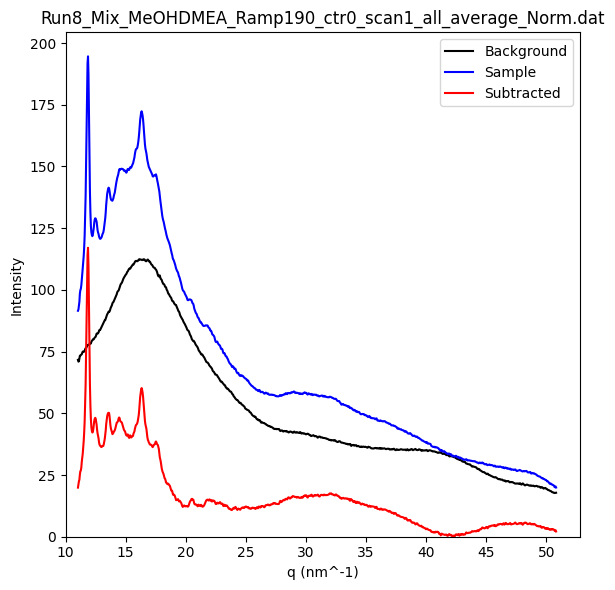

Found 1 files matching the pattern 'Run8_Mix_MeOHDMEA_Ramp190_ctr1_'
Run8_Mix_MeOHDMEA_Ramp190_ctr1_scan1_all_average_Norm.dat
Found 10 files matching the pattern 'Run8_MeOHDMEA_Hold190_ctr['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']_'
Run8_MeOHDMEA_Hold190_ctr8_scan1_all_average_Norm.dat
0.0825 32.087399


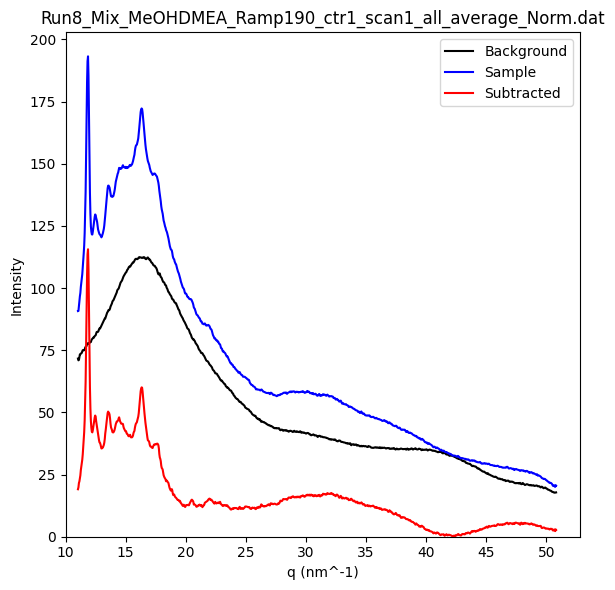

Found 1 files matching the pattern 'Run8_Mix_MeOHDMEA_Ramp190_ctr2_'
Run8_Mix_MeOHDMEA_Ramp190_ctr2_scan1_all_average_Norm.dat
Found 10 files matching the pattern 'Run8_MeOHDMEA_Hold190_ctr['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']_'
Run8_MeOHDMEA_Hold190_ctr8_scan1_all_average_Norm.dat
0.08777777777777777 38.759892


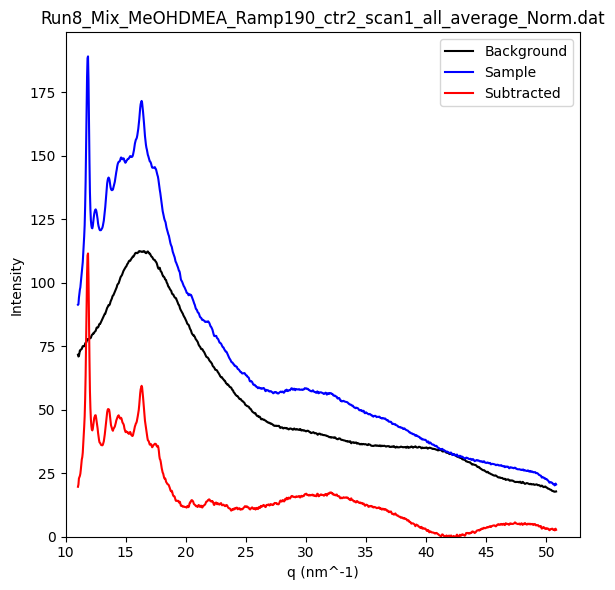

Found 1 files matching the pattern 'Run8_Mix_MeOHDMEA_Ramp190_ctr3_'
Run8_Mix_MeOHDMEA_Ramp190_ctr3_scan1_all_average_Norm.dat
Found 10 files matching the pattern 'Run8_MeOHDMEA_Hold190_ctr['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']_'
Run8_MeOHDMEA_Hold190_ctr8_scan1_all_average_Norm.dat
0.09361111111111112 46.384121


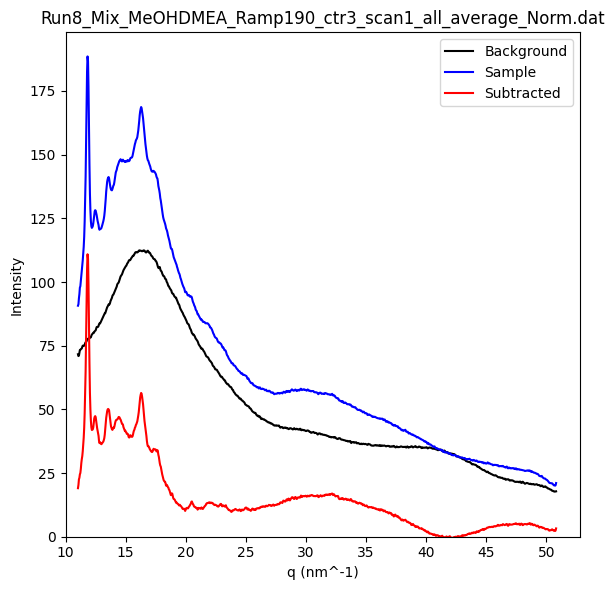

Found 1 files matching the pattern 'Run8_Mix_MeOHDMEA_Ramp190_ctr4_'
Run8_Mix_MeOHDMEA_Ramp190_ctr4_scan1_all_average_Norm.dat
Found 10 files matching the pattern 'Run8_MeOHDMEA_Hold190_ctr['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']_'
Run8_MeOHDMEA_Hold190_ctr8_scan1_all_average_Norm.dat
0.09944444444444445 53.561798


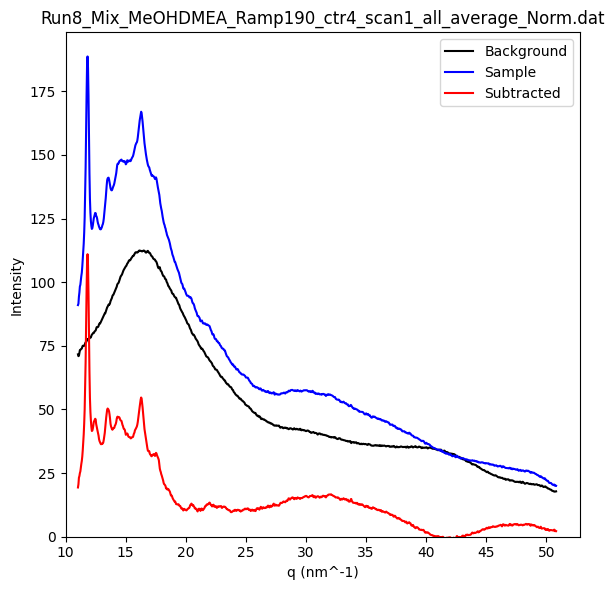

Found 1 files matching the pattern 'Run8_Mix_MeOHDMEA_Ramp190_ctr5_'
Run8_Mix_MeOHDMEA_Ramp190_ctr5_scan1_all_average_Norm.dat
Found 10 files matching the pattern 'Run8_MeOHDMEA_Hold190_ctr['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']_'
Run8_MeOHDMEA_Hold190_ctr8_scan1_all_average_Norm.dat
0.1044444444444445 59.64743


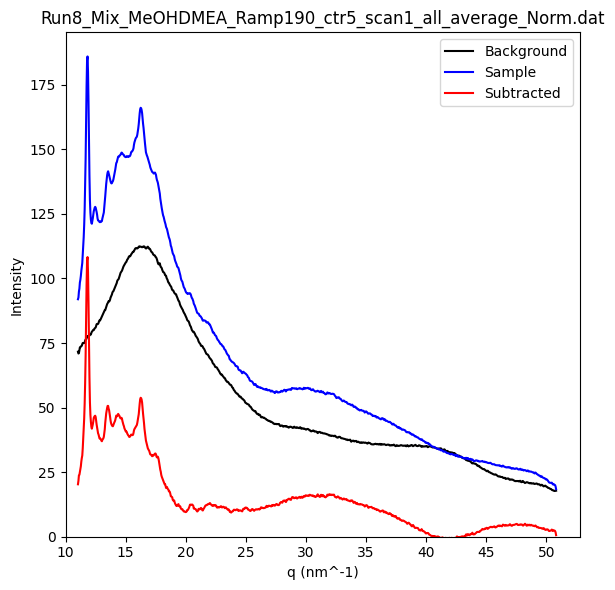

Found 1 files matching the pattern 'Run8_Mix_MeOHDMEA_Ramp190_ctr6_'
Run8_Mix_MeOHDMEA_Ramp190_ctr6_scan1_all_average_Norm.dat
Found 10 files matching the pattern 'Run8_MeOHDMEA_Hold190_ctr['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']_'
Run8_MeOHDMEA_Hold190_ctr8_scan1_all_average_Norm.dat
0.1102777777777778 65.848633


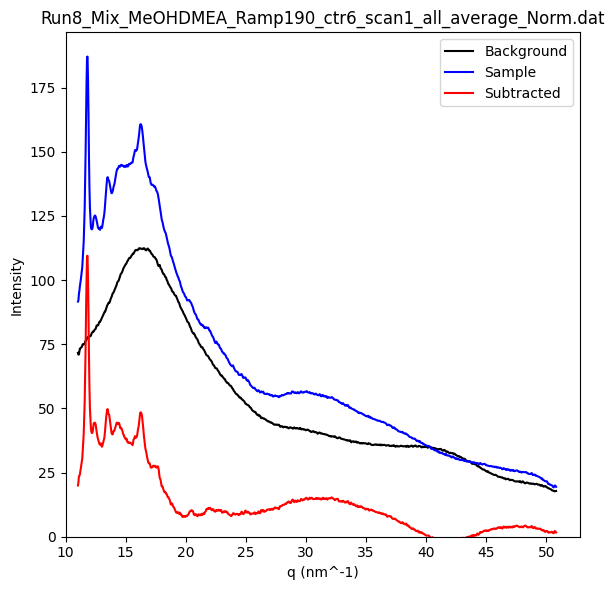

Found 1 files matching the pattern 'Run8_Mix_MeOHDMEA_Ramp190_ctr7_'
Run8_Mix_MeOHDMEA_Ramp190_ctr7_scan1_all_average_Norm.dat
Found 10 files matching the pattern 'Run8_MeOHDMEA_Hold190_ctr['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']_'
Run8_MeOHDMEA_Hold190_ctr8_scan1_all_average_Norm.dat
0.1155555555555556 71.197723


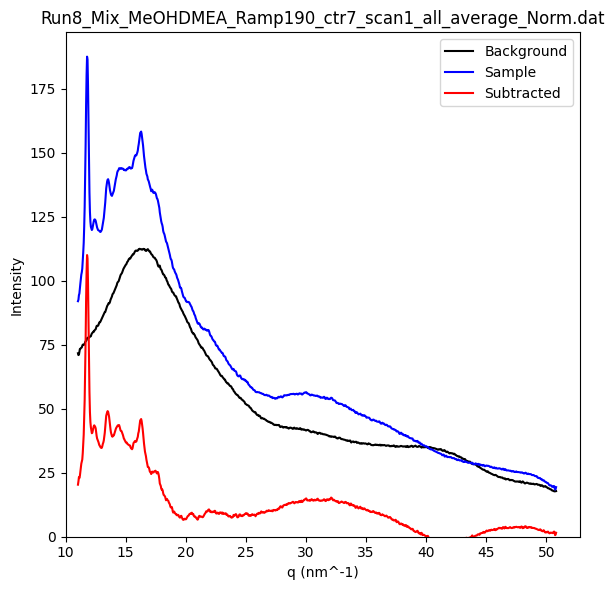

Found 1 files matching the pattern 'Run8_Mix_MeOHDMEA_Ramp190_ctr8_'
Run8_Mix_MeOHDMEA_Ramp190_ctr8_scan1_all_average_Norm.dat
Found 10 files matching the pattern 'Run8_MeOHDMEA_Hold190_ctr['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']_'
Run8_MeOHDMEA_Hold190_ctr8_scan1_all_average_Norm.dat
0.1208333333333333 76.255127


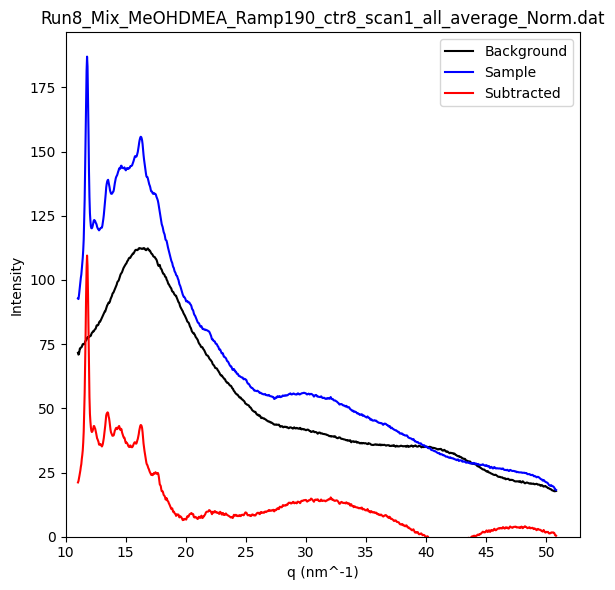

Found 1 files matching the pattern 'Run8_Mix_MeOHDMEA_Ramp190_ctr9_'
Run8_Mix_MeOHDMEA_Ramp190_ctr9_scan1_all_average_Norm.dat
Found 10 files matching the pattern 'Run8_MeOHDMEA_Hold190_ctr['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']_'
Run8_MeOHDMEA_Hold190_ctr8_scan1_all_average_Norm.dat
0.1266666666666667 81.571167


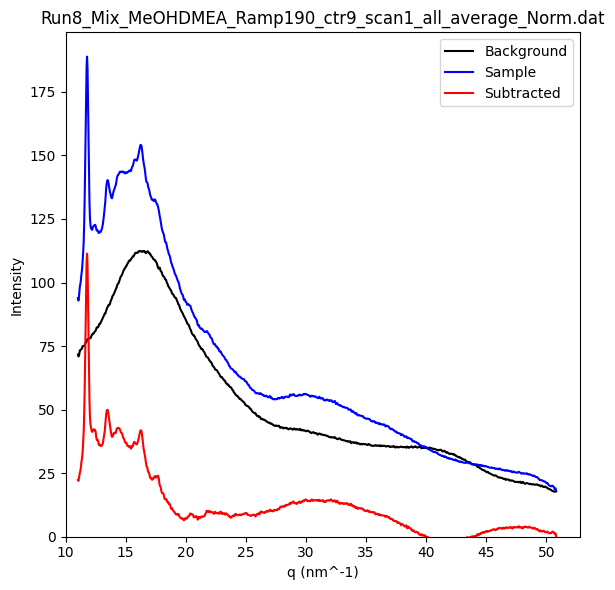

Found 1 files matching the pattern 'Run8_Mix_MeOHDMEA_Ramp190_ctr10_'
Run8_Mix_MeOHDMEA_Ramp190_ctr10_scan1_all_average_Norm.dat
Found 10 files matching the pattern 'Run8_MeOHDMEA_Hold190_ctr['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']_'
Run8_MeOHDMEA_Hold190_ctr8_scan1_all_average_Norm.dat
0.1316666666666667 86.160553


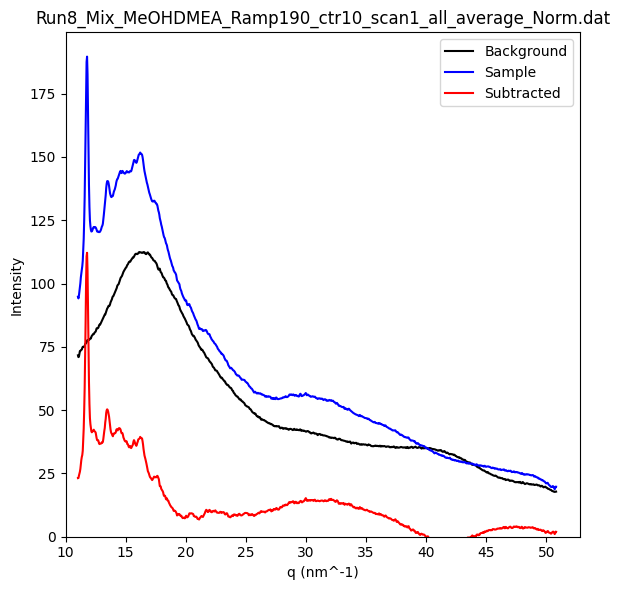

Found 1 files matching the pattern 'Run8_Mix_MeOHDMEA_Ramp190_ctr11_'
Run8_Mix_MeOHDMEA_Ramp190_ctr11_scan1_all_average_Norm.dat
Found 10 files matching the pattern 'Run8_MeOHDMEA_Hold190_ctr['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']_'
Run8_MeOHDMEA_Hold190_ctr8_scan1_all_average_Norm.dat
0.1375 91.005402


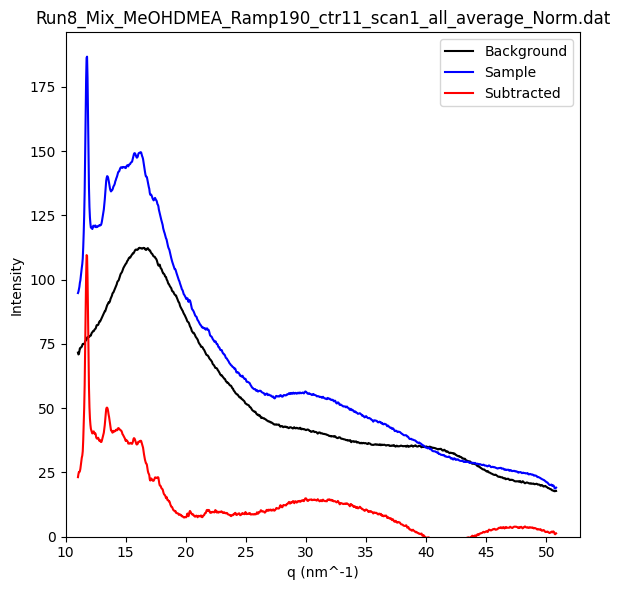

Found 1 files matching the pattern 'Run8_Mix_MeOHDMEA_Ramp190_ctr12_'
Run8_Mix_MeOHDMEA_Ramp190_ctr12_scan1_all_average_Norm.dat
Found 10 files matching the pattern 'Run8_MeOHDMEA_Hold190_ctr['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']_'
Run8_MeOHDMEA_Hold190_ctr8_scan1_all_average_Norm.dat
0.1433333333333333 95.633087


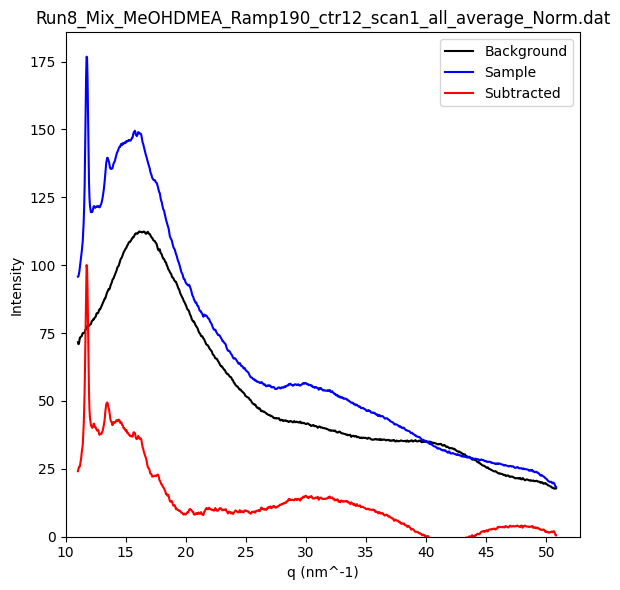

Found 1 files matching the pattern 'Run8_Mix_MeOHDMEA_Ramp190_ctr13_'
Run8_Mix_MeOHDMEA_Ramp190_ctr13_scan1_all_average_Norm.dat
Found 10 files matching the pattern 'Run8_MeOHDMEA_Hold190_ctr['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']_'
Run8_MeOHDMEA_Hold190_ctr8_scan1_all_average_Norm.dat
0.1491666666666667 100.0688


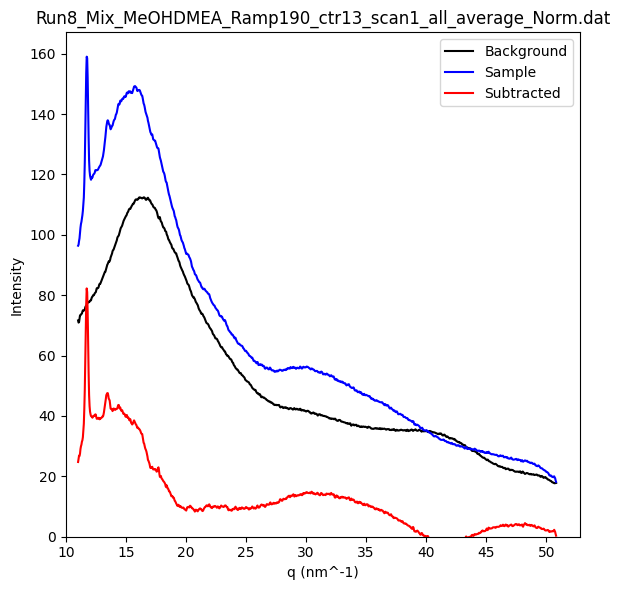

Found 1 files matching the pattern 'Run8_Mix_MeOHDMEA_Ramp190_ctr14_'
Run8_Mix_MeOHDMEA_Ramp190_ctr14_scan1_all_average_Norm.dat
Found 10 files matching the pattern 'Run8_MeOHDMEA_Hold190_ctr['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']_'
Run8_MeOHDMEA_Hold190_ctr8_scan1_all_average_Norm.dat
0.1541666666666667 103.9558


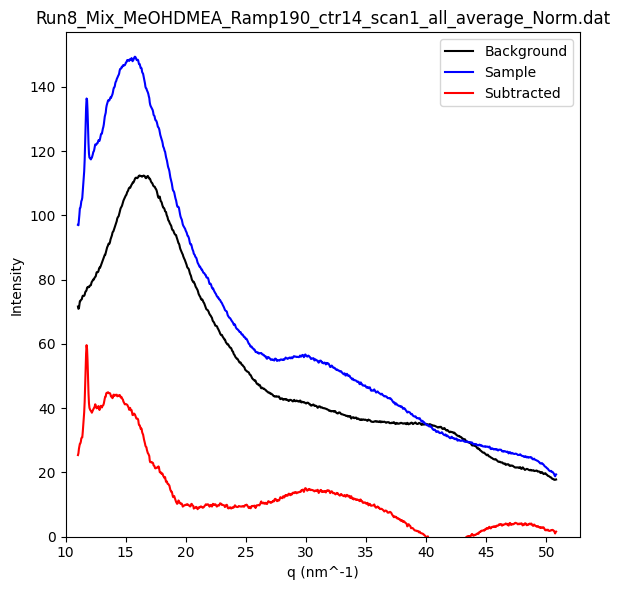

Found 1 files matching the pattern 'Run8_Mix_MeOHDMEA_Ramp190_ctr15_'
Run8_Mix_MeOHDMEA_Ramp190_ctr15_scan1_all_average_Norm.dat
Found 10 files matching the pattern 'Run8_MeOHDMEA_Hold190_ctr['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']_'
Run8_MeOHDMEA_Hold190_ctr8_scan1_all_average_Norm.dat
0.16 108.0976


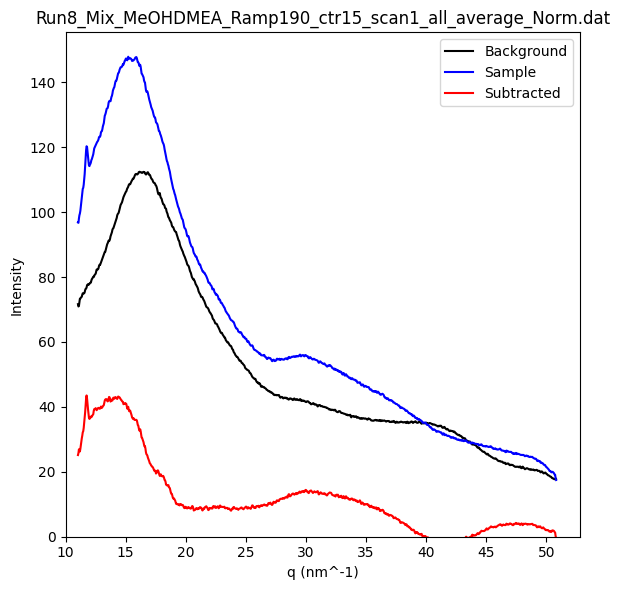

Found 1 files matching the pattern 'Run8_Mix_MeOHDMEA_Ramp190_ctr16_'
Run8_Mix_MeOHDMEA_Ramp190_ctr16_scan1_all_average_Norm.dat
Found 10 files matching the pattern 'Run8_MeOHDMEA_Hold190_ctr['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']_'
Run8_MeOHDMEA_Hold190_ctr8_scan1_all_average_Norm.dat
0.1658333333333333 112.0578


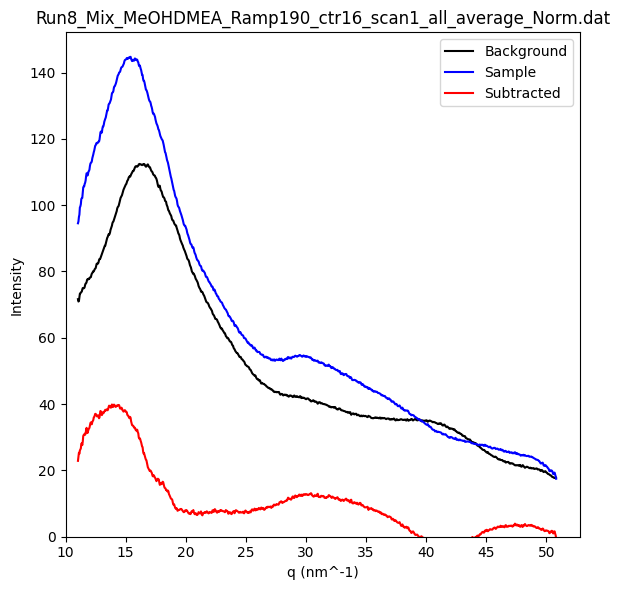

Found 1 files matching the pattern 'Run8_Mix_MeOHDMEA_Ramp190_ctr17_'
Run8_Mix_MeOHDMEA_Ramp190_ctr17_scan1_all_average_Norm.dat
Found 10 files matching the pattern 'Run8_MeOHDMEA_Hold190_ctr['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']_'
Run8_MeOHDMEA_Hold190_ctr8_scan1_all_average_Norm.dat
0.1711111111111111 115.5448


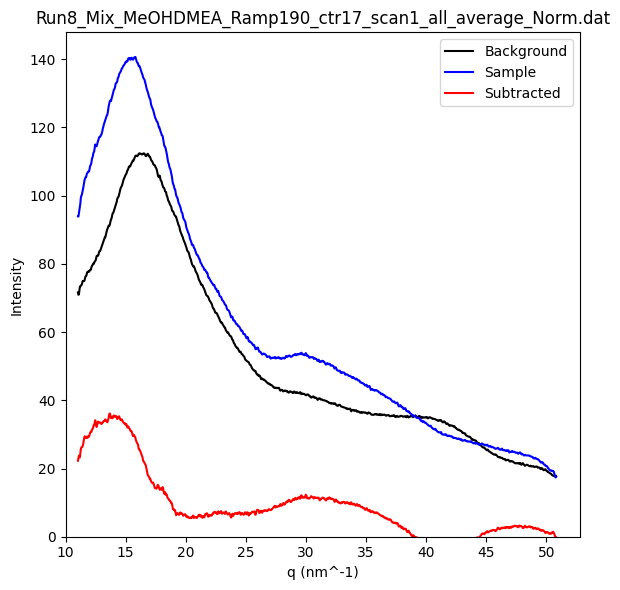

Found 1 files matching the pattern 'Run8_Mix_MeOHDMEA_Ramp190_ctr18_'
Run8_Mix_MeOHDMEA_Ramp190_ctr18_scan1_all_average_Norm.dat
Found 10 files matching the pattern 'Run8_MeOHDMEA_Hold190_ctr['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']_'
Run8_MeOHDMEA_Hold190_ctr8_scan1_all_average_Norm.dat
0.1763888888888889 118.913


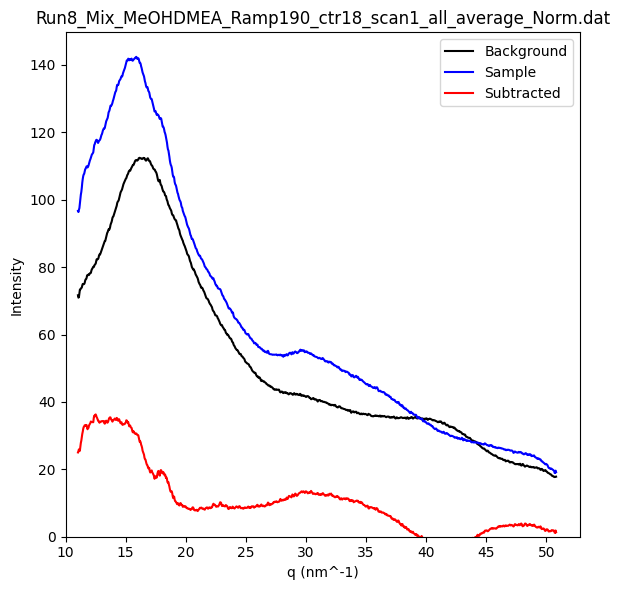

Found 1 files matching the pattern 'Run8_Mix_MeOHDMEA_Ramp190_ctr19_'
Run8_Mix_MeOHDMEA_Ramp190_ctr19_scan1_all_average_Norm.dat
Found 10 files matching the pattern 'Run8_MeOHDMEA_Hold190_ctr['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']_'
Run8_MeOHDMEA_Hold190_ctr8_scan1_all_average_Norm.dat
0.1819444444444444 122.4775


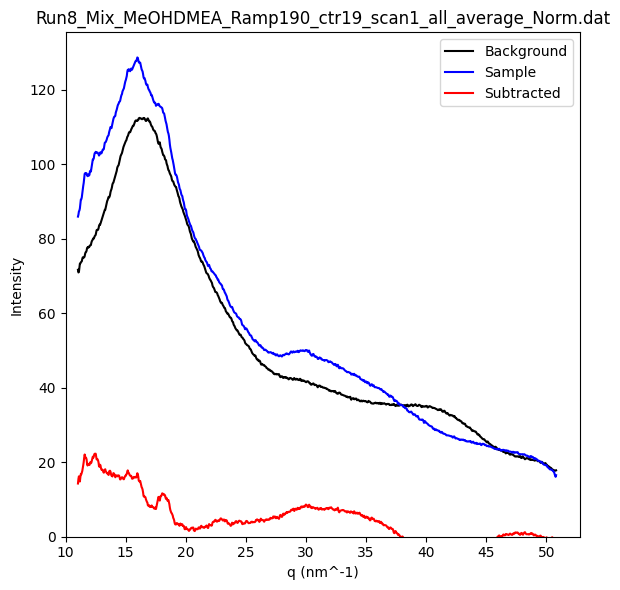

Found 1 files matching the pattern 'Run8_Mix_MeOHDMEA_Ramp190_ctr20_'
Run8_Mix_MeOHDMEA_Ramp190_ctr20_scan1_all_average_Norm.dat
Found 10 files matching the pattern 'Run8_MeOHDMEA_Hold190_ctr['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']_'
Run8_MeOHDMEA_Hold190_ctr8_scan1_all_average_Norm.dat
0.1872222222222222 125.6235


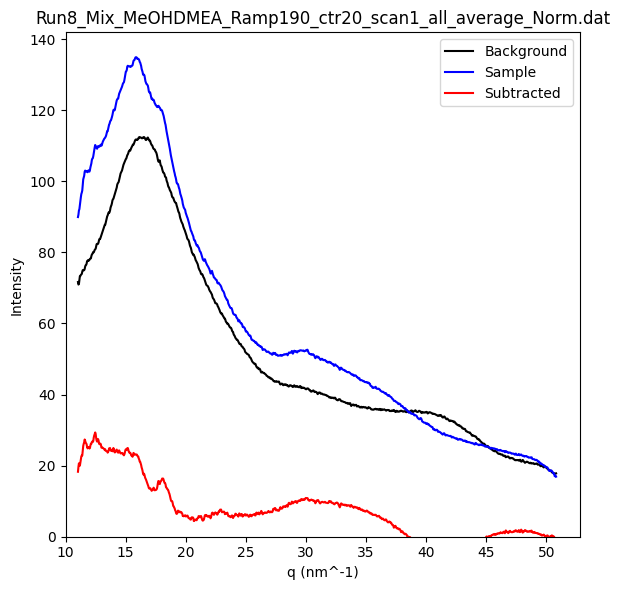

Found 1 files matching the pattern 'Run8_Mix_MeOHDMEA_Ramp190_ctr21_'
Run8_Mix_MeOHDMEA_Ramp190_ctr21_scan1_all_average_Norm.dat
Found 10 files matching the pattern 'Run8_MeOHDMEA_Hold190_ctr['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']_'
Run8_MeOHDMEA_Hold190_ctr8_scan1_all_average_Norm.dat
0.1930555555555556 128.95219


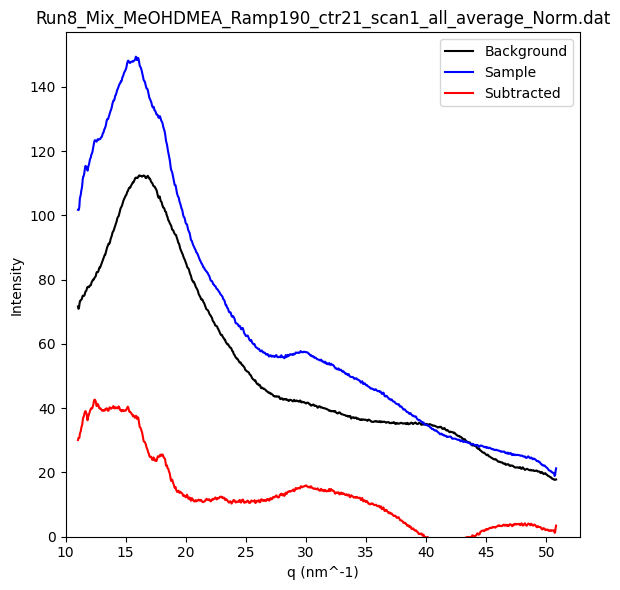

Found 1 files matching the pattern 'Run8_Mix_MeOHDMEA_Ramp190_ctr22_'
Run8_Mix_MeOHDMEA_Ramp190_ctr22_scan1_all_average_Norm.dat
Found 10 files matching the pattern 'Run8_MeOHDMEA_Hold190_ctr['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']_'
Run8_MeOHDMEA_Hold190_ctr8_scan1_all_average_Norm.dat
0.1988888888888889 132.1674


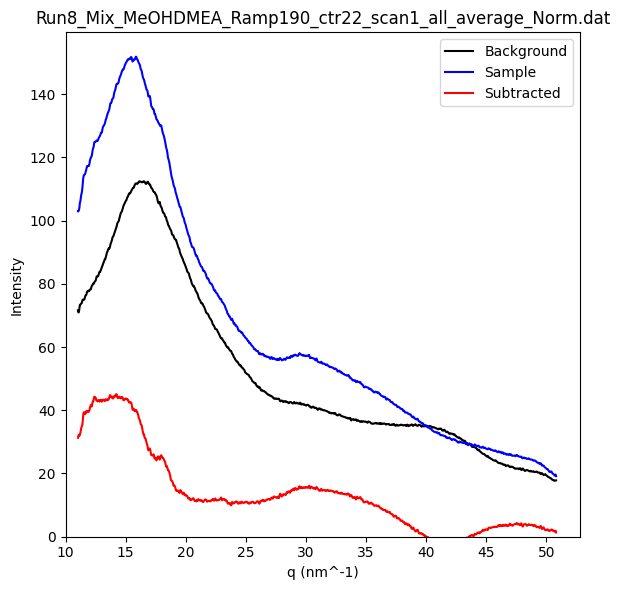

Found 1 files matching the pattern 'Run8_Mix_MeOHDMEA_Ramp190_ctr23_'
Run8_Mix_MeOHDMEA_Ramp190_ctr23_scan1_all_average_Norm.dat
Found 10 files matching the pattern 'Run8_MeOHDMEA_Hold190_ctr['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']_'
Run8_MeOHDMEA_Hold190_ctr8_scan1_all_average_Norm.dat
0.2047222222222222 135.2372


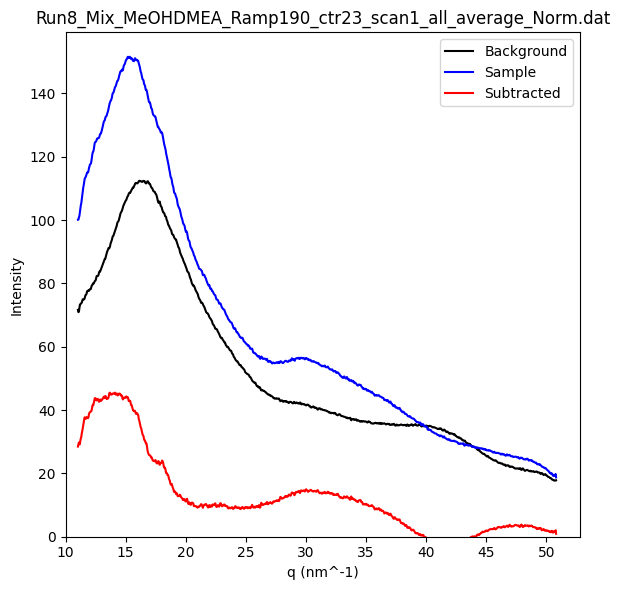

Found 1 files matching the pattern 'Run8_Mix_MeOHDMEA_Ramp190_ctr24_'
Run8_Mix_MeOHDMEA_Ramp190_ctr24_scan1_all_average_Norm.dat
Found 10 files matching the pattern 'Run8_MeOHDMEA_Hold190_ctr['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']_'
Run8_MeOHDMEA_Hold190_ctr8_scan1_all_average_Norm.dat
0.2097222222222222 137.95061


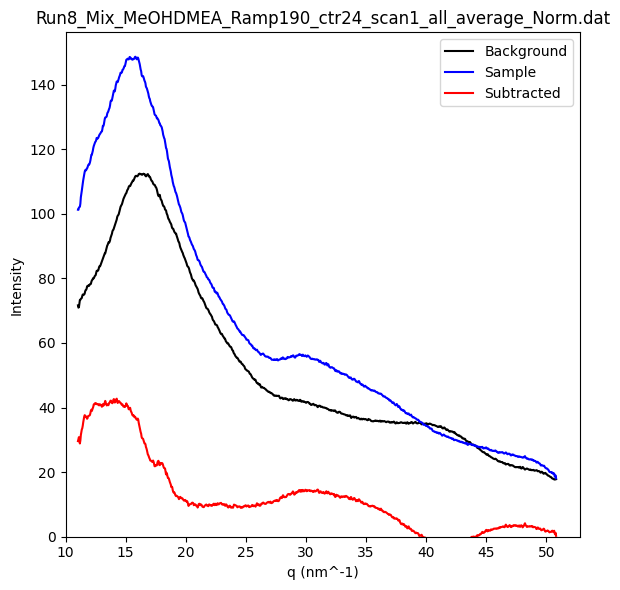

Found 1 files matching the pattern 'Run8_Mix_MeOHDMEA_Ramp190_ctr25_'
Run8_Mix_MeOHDMEA_Ramp190_ctr25_scan1_all_average_Norm.dat
Found 10 files matching the pattern 'Run8_MeOHDMEA_Hold190_ctr['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']_'
Run8_MeOHDMEA_Hold190_ctr8_scan1_all_average_Norm.dat
0.2155555555555556 140.82961


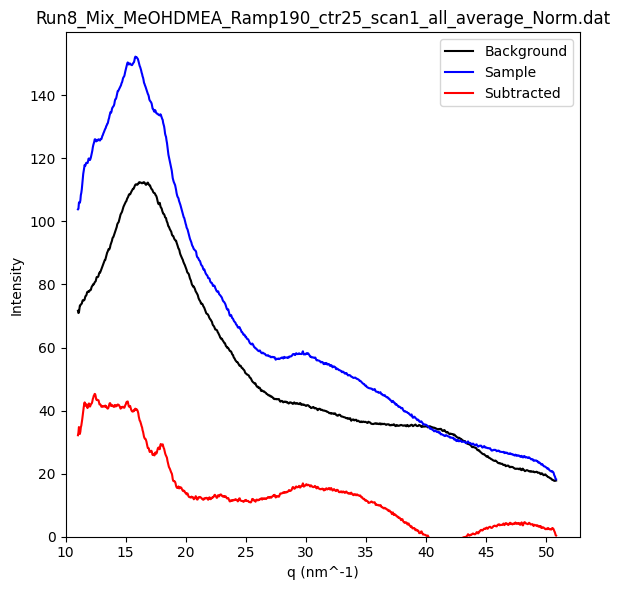

Found 1 files matching the pattern 'Run8_Mix_MeOHDMEA_Ramp190_ctr26_'
Run8_Mix_MeOHDMEA_Ramp190_ctr26_scan1_all_average_Norm.dat
Found 10 files matching the pattern 'Run8_MeOHDMEA_Hold190_ctr['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']_'
Run8_MeOHDMEA_Hold190_ctr8_scan1_all_average_Norm.dat
0.2213888888888889 143.59351


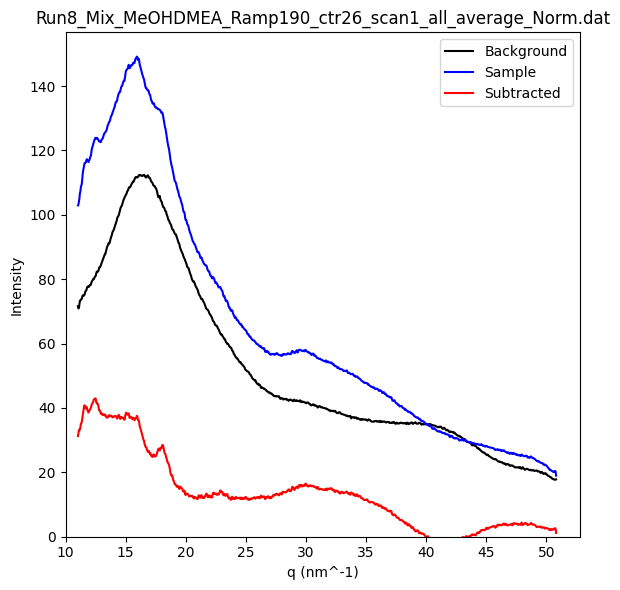

Found 1 files matching the pattern 'Run8_Mix_MeOHDMEA_Ramp190_ctr27_'
Run8_Mix_MeOHDMEA_Ramp190_ctr27_scan1_all_average_Norm.dat
Found 10 files matching the pattern 'Run8_MeOHDMEA_Hold190_ctr['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']_'
Run8_MeOHDMEA_Hold190_ctr8_scan1_all_average_Norm.dat
0.2269444444444444 146.2666


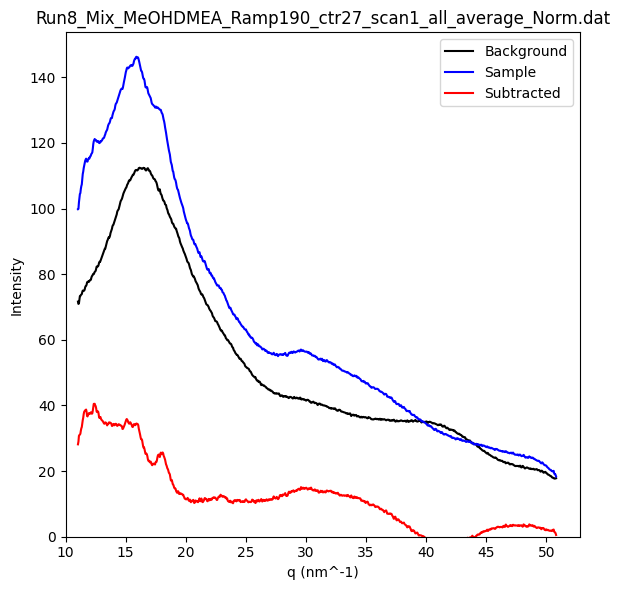

Found 1 files matching the pattern 'Run8_Mix_MeOHDMEA_Ramp190_ctr28_'
Run8_Mix_MeOHDMEA_Ramp190_ctr28_scan1_all_average_Norm.dat
Found 10 files matching the pattern 'Run8_MeOHDMEA_Hold190_ctr['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']_'
Run8_MeOHDMEA_Hold190_ctr8_scan1_all_average_Norm.dat
0.2322222222222222 148.6272


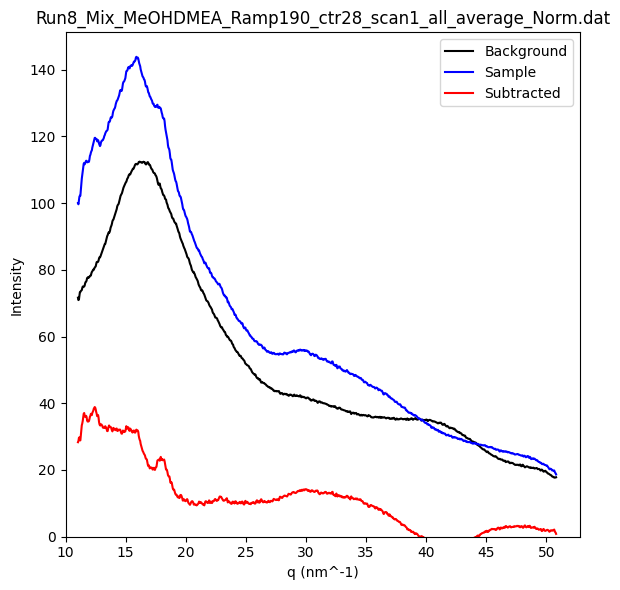

Found 1 files matching the pattern 'Run8_Mix_MeOHDMEA_Ramp190_ctr29_'
Run8_Mix_MeOHDMEA_Ramp190_ctr29_scan1_all_average_Norm.dat
Found 10 files matching the pattern 'Run8_MeOHDMEA_Hold190_ctr['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']_'
Run8_MeOHDMEA_Hold190_ctr8_scan1_all_average_Norm.dat
0.2375 150.9157


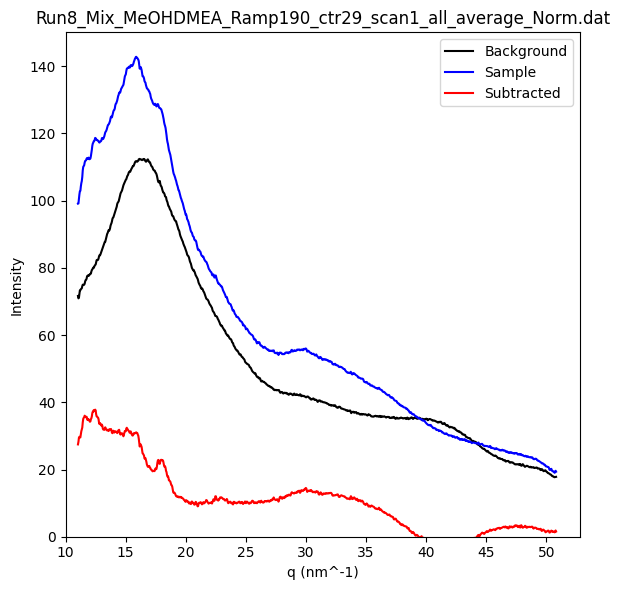

Found 1 files matching the pattern 'Run8_Mix_MeOHDMEA_Ramp190_ctr30_'
Run8_Mix_MeOHDMEA_Ramp190_ctr30_scan1_all_average_Norm.dat
Found 10 files matching the pattern 'Run8_MeOHDMEA_Hold190_ctr['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']_'
Run8_MeOHDMEA_Hold190_ctr8_scan1_all_average_Norm.dat
0.2433333333333333 153.3246


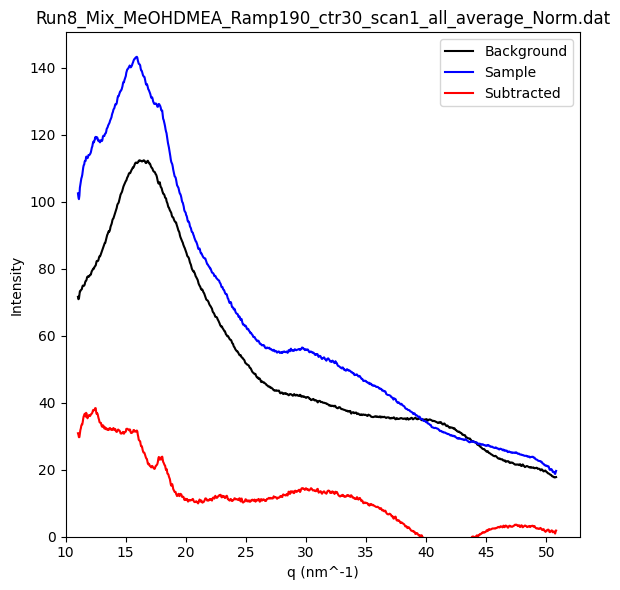

Found 1 files matching the pattern 'Run8_Mix_MeOHDMEA_Ramp190_ctr31_'
Run8_Mix_MeOHDMEA_Ramp190_ctr31_scan1_all_average_Norm.dat
Found 10 files matching the pattern 'Run8_MeOHDMEA_Hold190_ctr['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']_'
Run8_MeOHDMEA_Hold190_ctr8_scan1_all_average_Norm.dat
0.2488888888888889 155.66119


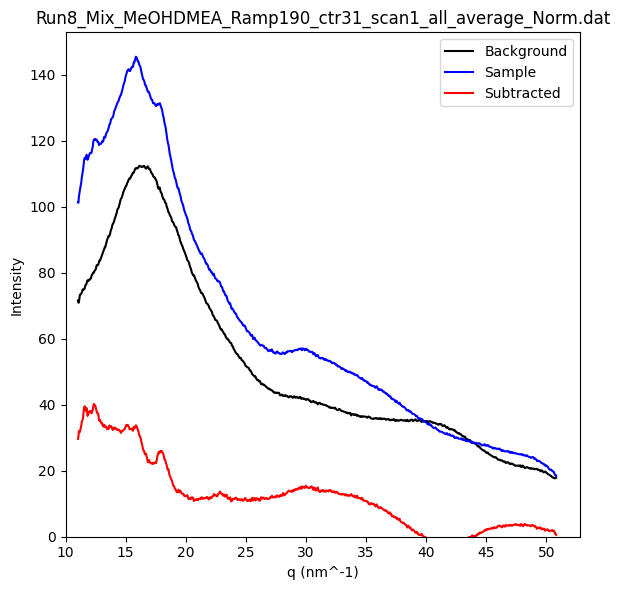

Found 1 files matching the pattern 'Run8_Mix_MeOHDMEA_Ramp190_ctr32_'
Run8_Mix_MeOHDMEA_Ramp190_ctr32_scan1_all_average_Norm.dat
Found 10 files matching the pattern 'Run8_MeOHDMEA_Hold190_ctr['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']_'
Run8_MeOHDMEA_Hold190_ctr8_scan1_all_average_Norm.dat
0.2541666666666667 157.72189


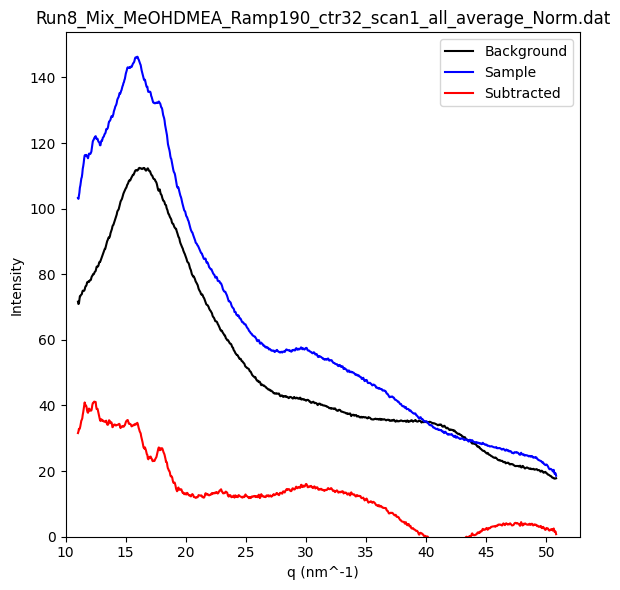

Found 1 files matching the pattern 'Run8_Mix_MeOHDMEA_Ramp190_ctr33_'
Run8_Mix_MeOHDMEA_Ramp190_ctr33_scan1_all_average_Norm.dat
Found 10 files matching the pattern 'Run8_MeOHDMEA_Hold190_ctr['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']_'
Run8_MeOHDMEA_Hold190_ctr8_scan1_all_average_Norm.dat
0.2594444444444444 159.7198


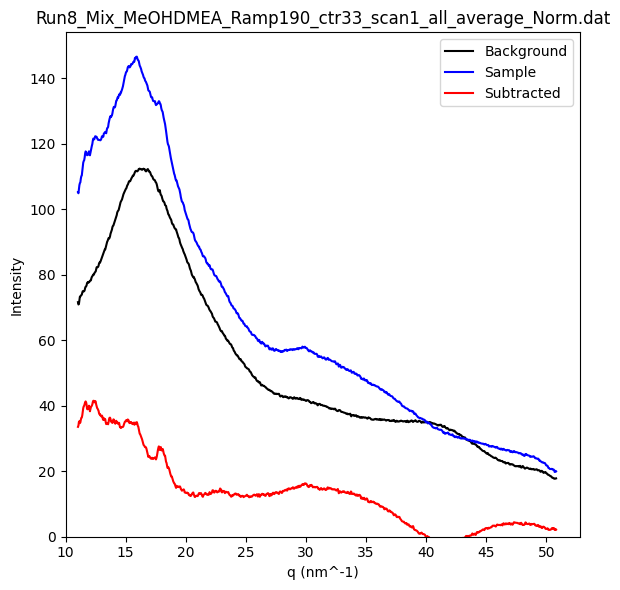

Found 1 files matching the pattern 'Run8_Mix_MeOHDMEA_Ramp190_ctr34_'
Run8_Mix_MeOHDMEA_Ramp190_ctr34_scan1_all_average_Norm.dat
Found 10 files matching the pattern 'Run8_MeOHDMEA_Hold190_ctr['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']_'
Run8_MeOHDMEA_Hold190_ctr8_scan1_all_average_Norm.dat
0.2652777777777778 161.8448


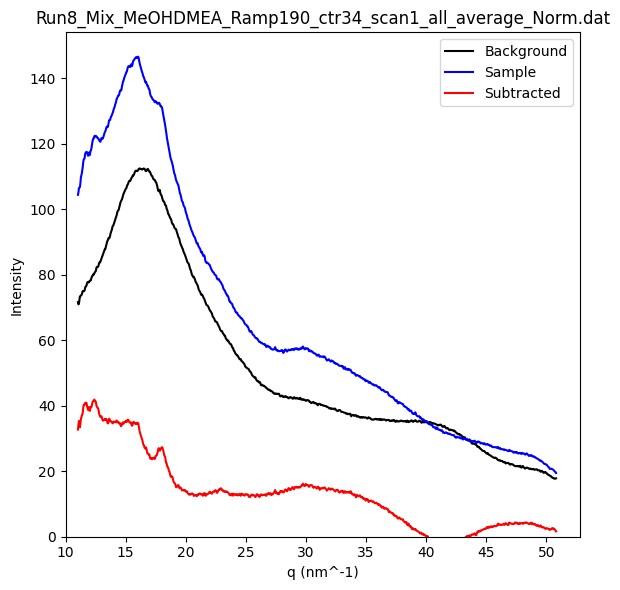

Found 1 files matching the pattern 'Run8_Mix_MeOHDMEA_Ramp190_ctr35_'
Run8_Mix_MeOHDMEA_Ramp190_ctr35_scan1_all_average_Norm.dat
Found 10 files matching the pattern 'Run8_MeOHDMEA_Hold190_ctr['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']_'
Run8_MeOHDMEA_Hold190_ctr8_scan1_all_average_Norm.dat
0.2711111111111111 163.8914


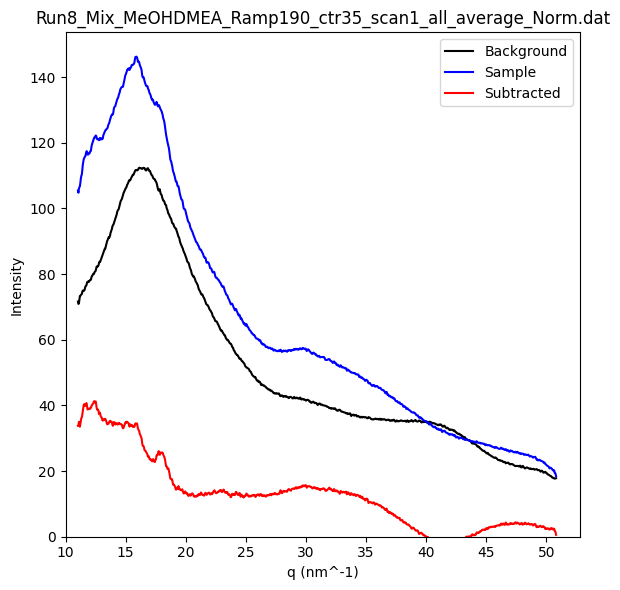

Found 1 files matching the pattern 'Run8_Mix_MeOHDMEA_Ramp190_ctr36_'
Run8_Mix_MeOHDMEA_Ramp190_ctr36_scan1_all_average_Norm.dat
Found 10 files matching the pattern 'Run8_MeOHDMEA_Hold190_ctr['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']_'
Run8_MeOHDMEA_Hold190_ctr8_scan1_all_average_Norm.dat
0.2763888888888889 165.69859


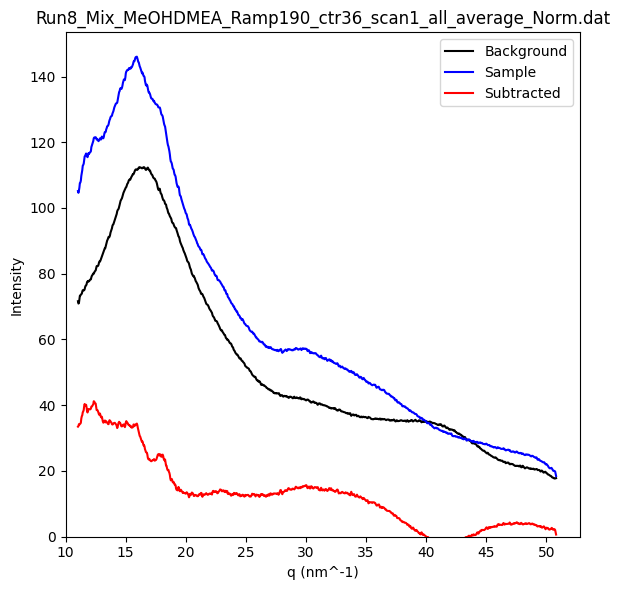

Found 1 files matching the pattern 'Run8_Mix_MeOHDMEA_Ramp190_ctr37_'
Run8_Mix_MeOHDMEA_Ramp190_ctr37_scan1_all_average_Norm.dat
Found 10 files matching the pattern 'Run8_MeOHDMEA_Hold190_ctr['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']_'
Run8_MeOHDMEA_Hold190_ctr8_scan1_all_average_Norm.dat
0.2813888888888889 167.4408


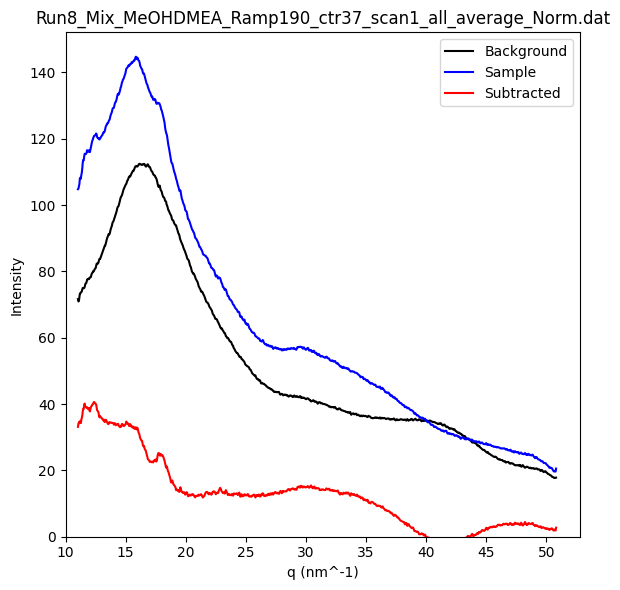

Found 1 files matching the pattern 'Run8_Mix_MeOHDMEA_Ramp190_ctr38_'
Run8_Mix_MeOHDMEA_Ramp190_ctr38_scan1_all_average_Norm.dat
Found 10 files matching the pattern 'Run8_MeOHDMEA_Hold190_ctr['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']_'
Run8_MeOHDMEA_Hold190_ctr8_scan1_all_average_Norm.dat
0.2866666666666667 169.14931


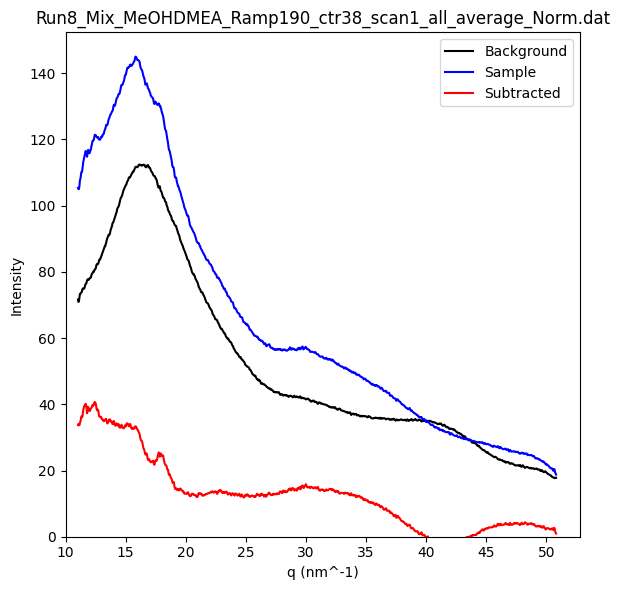

Found 1 files matching the pattern 'Run8_Mix_MeOHDMEA_Ramp190_ctr39_'
Run8_Mix_MeOHDMEA_Ramp190_ctr39_scan1_all_average_Norm.dat
Found 10 files matching the pattern 'Run8_MeOHDMEA_Hold190_ctr['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']_'
Run8_MeOHDMEA_Hold190_ctr8_scan1_all_average_Norm.dat
0.2919444444444445 170.7968


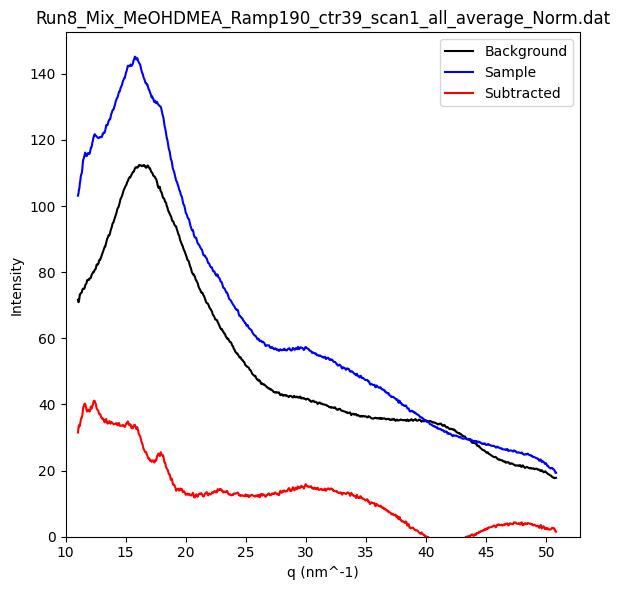

Found 1 files matching the pattern 'Run8_Mix_MeOHDMEA_Ramp190_ctr40_'
Run8_Mix_MeOHDMEA_Ramp190_ctr40_scan1_all_average_Norm.dat
Found 10 files matching the pattern 'Run8_MeOHDMEA_Hold190_ctr['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']_'
Run8_MeOHDMEA_Hold190_ctr8_scan1_all_average_Norm.dat
0.2972222222222222 172.3945


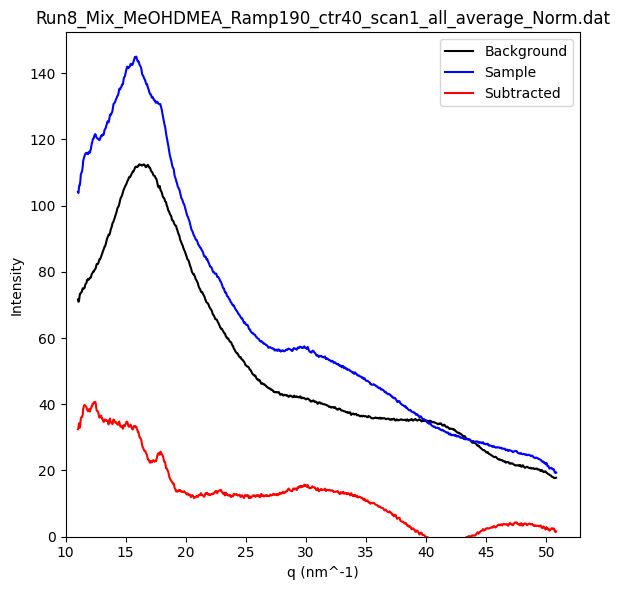

Found 1 files matching the pattern 'Run8_Mix_MeOHDMEA_Ramp190_ctr41_'
Run8_Mix_MeOHDMEA_Ramp190_ctr41_scan1_all_average_Norm.dat
Found 10 files matching the pattern 'Run8_MeOHDMEA_Hold190_ctr['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']_'
Run8_MeOHDMEA_Hold190_ctr8_scan1_all_average_Norm.dat
0.3025 173.9509


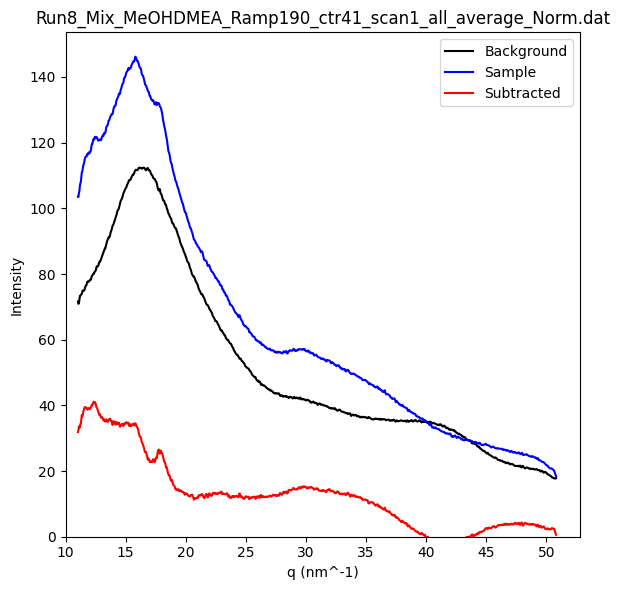

Found 1 files matching the pattern 'Run8_Mix_MeOHDMEA_Ramp190_ctr42_'
Run8_Mix_MeOHDMEA_Ramp190_ctr42_scan1_all_average_Norm.dat
Found 10 files matching the pattern 'Run8_MeOHDMEA_Hold190_ctr['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']_'
Run8_MeOHDMEA_Hold190_ctr8_scan1_all_average_Norm.dat
0.3077777777777778 175.45129


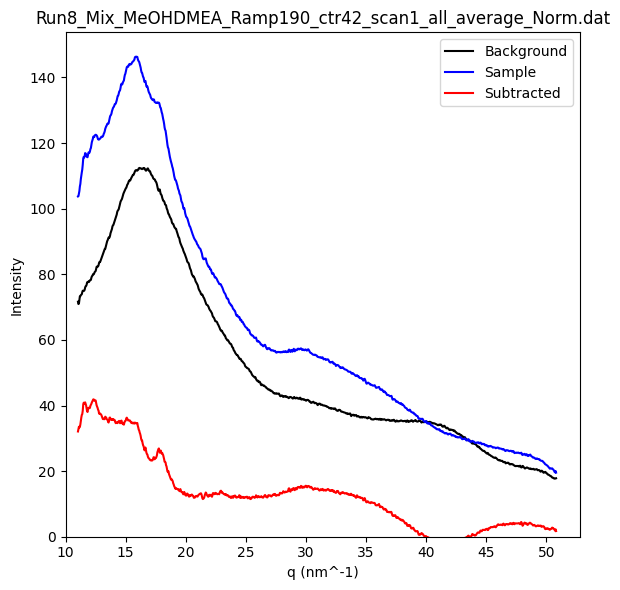

Found 1 files matching the pattern 'Run8_Mix_MeOHDMEA_Ramp190_ctr43_'
Run8_Mix_MeOHDMEA_Ramp190_ctr43_scan1_all_average_Norm.dat
Found 10 files matching the pattern 'Run8_MeOHDMEA_Hold190_ctr['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']_'
Run8_MeOHDMEA_Hold190_ctr8_scan1_all_average_Norm.dat
0.3130555555555555 176.92101


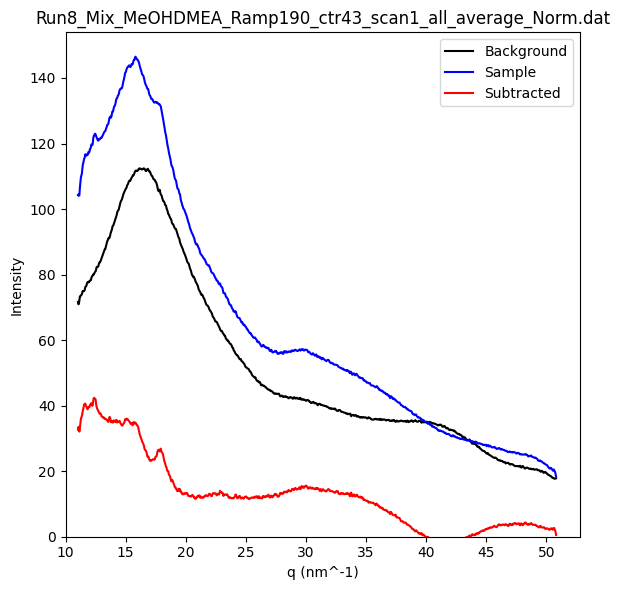

Found 1 files matching the pattern 'Run8_Mix_MeOHDMEA_Ramp190_ctr44_'
Run8_Mix_MeOHDMEA_Ramp190_ctr44_scan1_all_average_Norm.dat
Found 10 files matching the pattern 'Run8_MeOHDMEA_Hold190_ctr['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']_'
Run8_MeOHDMEA_Hold190_ctr8_scan1_all_average_Norm.dat
0.3183333333333334 178.34731


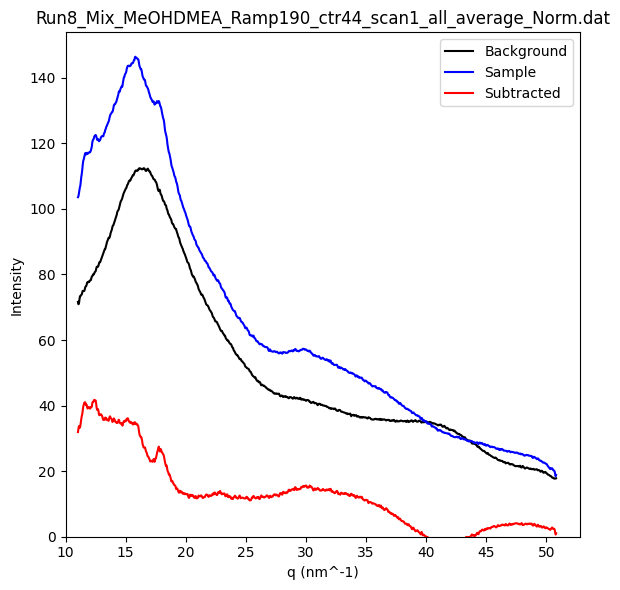

Found 1 files matching the pattern 'Run8_Mix_MeOHDMEA_Ramp190_ctr45_'
Run8_Mix_MeOHDMEA_Ramp190_ctr45_scan1_all_average_Norm.dat
Found 10 files matching the pattern 'Run8_MeOHDMEA_Hold190_ctr['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']_'
Run8_MeOHDMEA_Hold190_ctr8_scan1_all_average_Norm.dat
0.3236111111111111 179.735


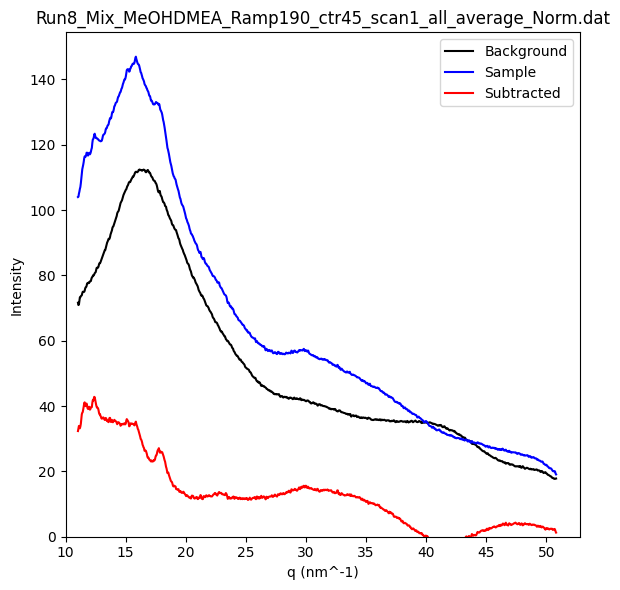

Found 1 files matching the pattern 'Run8_Mix_MeOHDMEA_Ramp190_ctr46_'
Run8_Mix_MeOHDMEA_Ramp190_ctr46_scan1_all_average_Norm.dat
Found 10 files matching the pattern 'Run8_MeOHDMEA_Hold190_ctr['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']_'
Run8_MeOHDMEA_Hold190_ctr8_scan1_all_average_Norm.dat
0.3291666666666667 181.2066


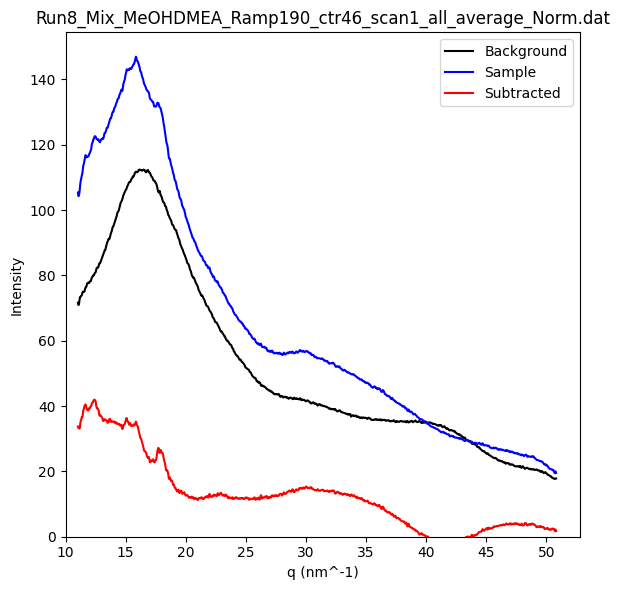

Found 1 files matching the pattern 'Run8_Mix_MeOHDMEA_Ramp190_ctr47_'
Run8_Mix_MeOHDMEA_Ramp190_ctr47_scan1_all_average_Norm.dat
Found 10 files matching the pattern 'Run8_MeOHDMEA_Hold190_ctr['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']_'
Run8_MeOHDMEA_Hold190_ctr8_scan1_all_average_Norm.dat
0.335 182.6393


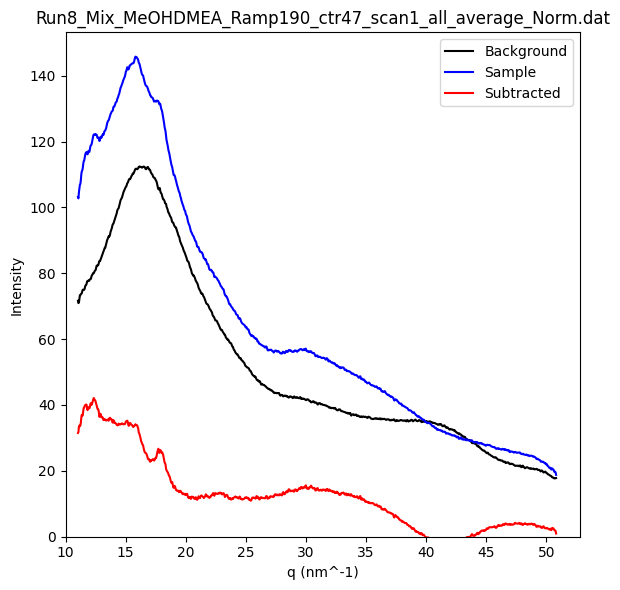

Found 1 files matching the pattern 'Run8_Mix_MeOHDMEA_Ramp190_ctr48_'
Run8_Mix_MeOHDMEA_Ramp190_ctr48_scan1_all_average_Norm.dat
Found 10 files matching the pattern 'Run8_MeOHDMEA_Hold190_ctr['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']_'
Run8_MeOHDMEA_Hold190_ctr8_scan1_all_average_Norm.dat
0.3408333333333333 184.0376


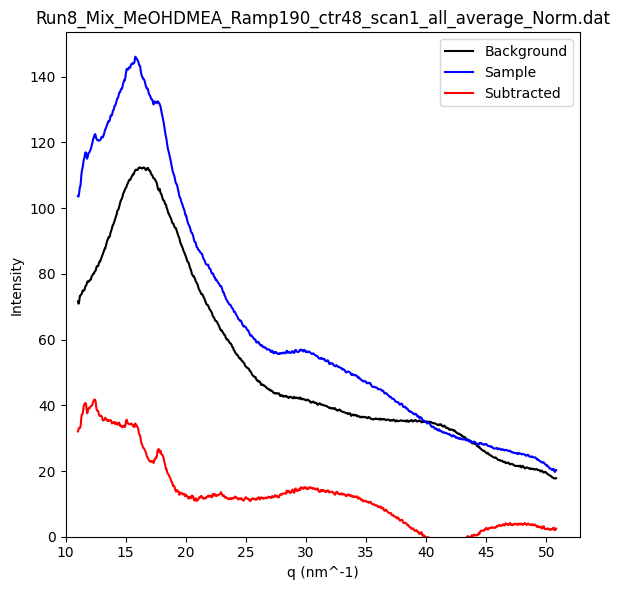

Found 1 files matching the pattern 'Run8_Mix_MeOHDMEA_Ramp190_ctr49_'
Run8_Mix_MeOHDMEA_Ramp190_ctr49_scan1_all_average_Norm.dat
Found 10 files matching the pattern 'Run8_MeOHDMEA_Hold190_ctr['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']_'
Run8_MeOHDMEA_Hold190_ctr8_scan1_all_average_Norm.dat
0.3461111111111111 185.28729


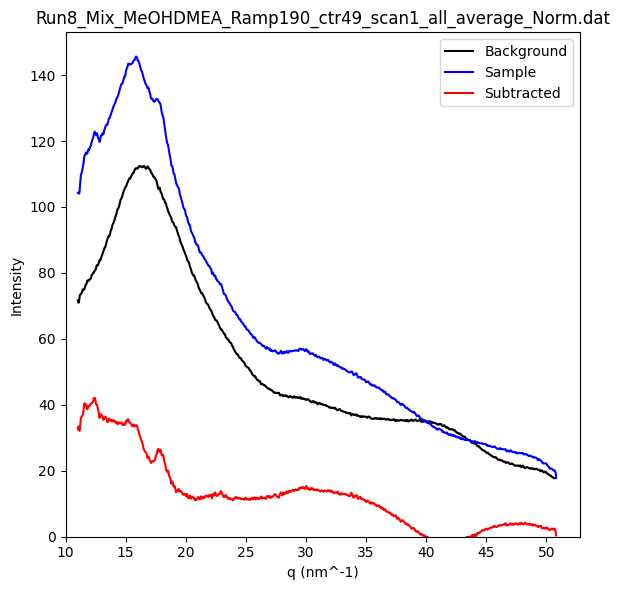

Found 1 files matching the pattern 'Run8_Mix_MeOHDMEA_Ramp190_ctr50_'
Run8_Mix_MeOHDMEA_Ramp190_ctr50_scan1_all_average_Norm.dat
Found 10 files matching the pattern 'Run8_MeOHDMEA_Hold190_ctr['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']_'
Run8_MeOHDMEA_Hold190_ctr8_scan1_all_average_Norm.dat
0.3513888888888889 186.4894


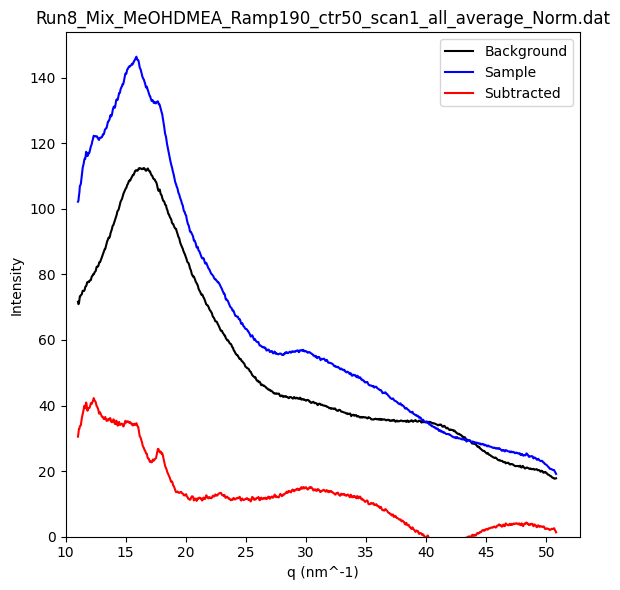

Found 1 files matching the pattern 'Run8_Mix_MeOHDMEA_Ramp190_ctr51_'
Run8_Mix_MeOHDMEA_Ramp190_ctr51_scan1_all_average_Norm.dat
Found 10 files matching the pattern 'Run8_MeOHDMEA_Hold190_ctr['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']_'
Run8_MeOHDMEA_Hold190_ctr8_scan1_all_average_Norm.dat
0.3566666666666667 187.6617


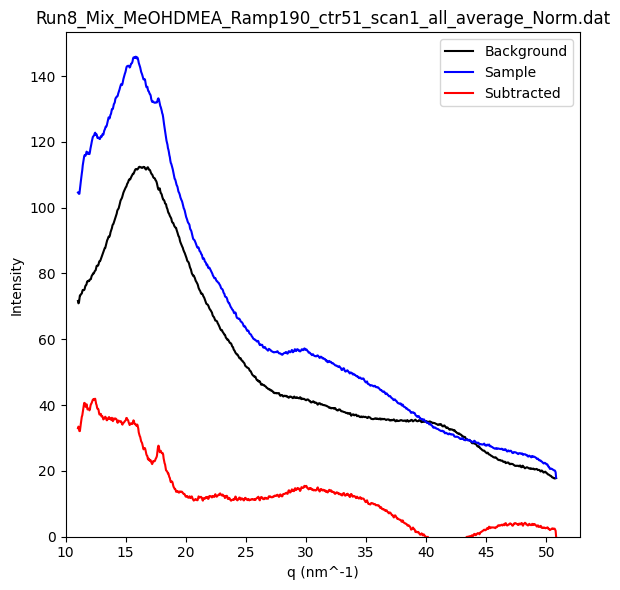

Found 1 files matching the pattern 'Run8_Mix_MeOHDMEA_Ramp190_ctr52_'
Run8_Mix_MeOHDMEA_Ramp190_ctr52_scan1_all_average_Norm.dat
Found 10 files matching the pattern 'Run8_MeOHDMEA_Hold190_ctr['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']_'
Run8_MeOHDMEA_Hold190_ctr8_scan1_all_average_Norm.dat
0.3622222222222222 188.9095


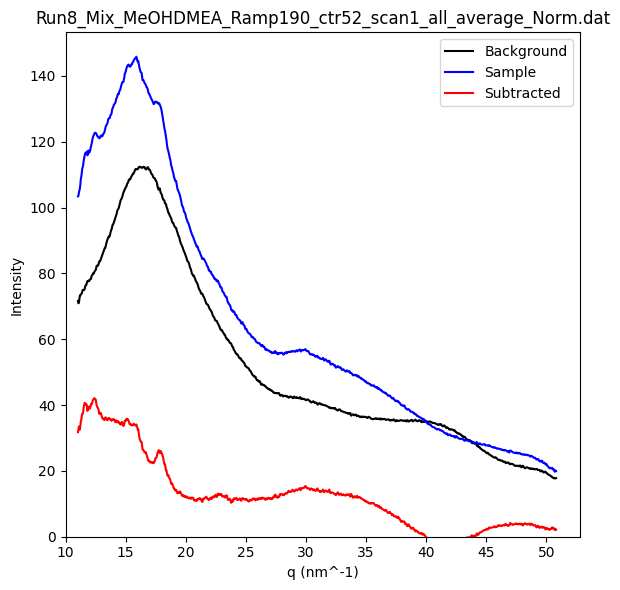

In [4]:

folder_path_base = '/Users/akmaurya/Library/CloudStorage/OneDrive-SLACNationalAcceleratorLaboratory/My Onedrive/Data_01/Methanolysis/Dec2023/OneD_integrated_WAXS_01/Correction/Normlised'
save_WAXS_sub_files = os.path.join(folder_path_base.replace("Normlised", ""), "Subtracted")

#search_keywords = [str(10*i) for i in range(3,25)]
search_keywords = [str(1*i) for i in range(0,53)]

bkg_search_keywords = [str(1*i) for i in range(0,1)]

search_bkg_keyword = bkg_search_keywords

search_bkg_keyword = search_keywords
#print(search_keywords)
sample_keyword = "Run8_Mix_MeOHDMEA_Ramp190_ctr"
bkg_keyword = "Run8_MeOHDMEA_Hold190_ctr"

#sample_keyword = "Run8_Mix_MeOHDMEA_Hold190_ctr"
#bkg_keyword = "Run8_MeOHDMEA_Hold190_ctr"

#sample_keyword = "Run8_Mix_MeOHDMEA_Cool_ctr"
#bkg_keyword = "Run8_MeOHDMEA_RT_ctr"#

#sample_keyword = "Run8_Mix_MeOHDMEA_RT_ctr"
#bkg_keyword = "Run8_MeOHDMEA_RT_ctr"

alpha = 0.98

#bkg_keyword = "Run5_Empty_capi_T"

#alpha = 1.0

i = 0
for keyword in search_keywords:

    matching_sample_files = search_dat_files_with_keywords(folder_path_base, keyword, sample_keyword)
    filename_search_sample = matching_sample_files[0]
    print(filename_search_sample)

    #search_bkg_keyword = search_bkg_keyword
    matching_bkg_files = search_dat_files_with_keywords(folder_path_base, search_bkg_keyword, bkg_keyword)
    filename_search_bkg = matching_bkg_files[0]
    print(filename_search_bkg)

    bkg_data, time_hr_bkg, CTEMP_bkg, I0_bkg, bstop_bkg = read_single_file_with_keyword(folder_path_base, filename_search_bkg)
    q_bkg = bkg_data["q_nm^-1"]
    I_bkg_avg = bkg_data["I"]
    I_bkg_sigma = bkg_data["sigma"]

    fig, axs = plt.subplots(figsize=(6, 6))
    sample_data, time_hr, CTEMP, I0, bstop = read_single_file_with_keyword(folder_path_base, filename_search_sample)
    print(time_hr, CTEMP)
    q_sample = sample_data["q_nm^-1"]
    I_sample_avg = sample_data["I"]
    I_sample_sigma = sample_data["sigma"]

    I_sample_sub_avg = [sample - alpha * bkg for sample, bkg in zip(I_sample_avg, I_bkg_avg)]
    I_sample_sub_sigma = [np.sqrt(sample**2 + alpha**2 * bkg**2) for sample, bkg in zip(I_sample_sigma, I_bkg_sigma)]

    axs.set_title(filename_search_sample)
    axs.set_xlabel("q (nm^-1)")
    axs.set_ylabel("Intensity")
    axs.plot(q_bkg, I_bkg_avg*np.array(alpha), '-k', label="Background")
    axs.plot(q_sample, I_sample_avg, '-b', label="Sample")
    axs.plot(q_sample, I_sample_sub_avg, '-r', label="Subtracted")
    axs.legend()

    axs.set_xlim(10, )
    axs.set_ylim(0,)
    # Adjust layout
    plt.tight_layout()

    # Show the subplots
    plt.show()

    # Create a DataFrame for subtracted data
    data = {"q_nm^-1": q_sample, "I_avg_sub": I_sample_sub_avg, "I_avg_sub_sigma": I_sample_sub_sigma, "I_sample": I_sample_avg}
    df = pd.DataFrame(data)

    # Define the data file path
    # Extract the part of filename_search_sample before "scan1"
    filename_search_sample1 = filename_search_sample.split("scan1")[0]
    dat_filename = os.path.join(save_WAXS_sub_files, f"{filename_search_sample1}all_avg_sub.dat")
    #print(dat_filename)
    # Define the headers
    headers = [
        f"Sample: {filename_search_sample}",
        f"Background: {filename_search_bkg}",
        'Time_duration_hr  ----- CTEMP -----  I0 ----- bstop',
        f"{time_hr}, {CTEMP}, {I0},{bstop}", 
        'lorentian_length  ----- lorentian_scale -----  peak_pos ----- porod_exp ----- porod_scale',
       # f"{lorentian_length}, {lorentian_scale}, {peak_pos},{porod_exp},{porod_scale}",
        "q_nm^-1 ------ I_avg_subtracted ------ I_avg_subtracted_sigma ------ I_fit",
    ]
    commented_headers = ['# ' + header for header in headers]

    # Write the data to the file
    with open(dat_filename, 'w') as dat_file:
        dat_file.write('\n'.join(commented_headers) + '\n')
        df.to_csv(dat_file, sep='\t', index=False, header=False)

    # Store time_hr and CTEMP values
    #time_hr_values.append(time_hr)
    #CTEMP_values.append(CTEMP)



# Plot _subtracted waxs data

Run8_Mix_MeOHDMEA_Hold190_ctr0_all_avg_sub.dat
Run8_Mix_MeOHDMEA_Hold190_ctr1_all_avg_sub.dat
Run8_Mix_MeOHDMEA_Hold190_ctr2_all_avg_sub.dat
Run8_Mix_MeOHDMEA_Hold190_ctr3_all_avg_sub.dat
Run8_Mix_MeOHDMEA_Hold190_ctr4_all_avg_sub.dat
Run8_Mix_MeOHDMEA_Hold190_ctr5_all_avg_sub.dat
Run8_Mix_MeOHDMEA_Hold190_ctr6_all_avg_sub.dat
Run8_Mix_MeOHDMEA_Hold190_ctr7_all_avg_sub.dat
Run8_Mix_MeOHDMEA_Hold190_ctr8_all_avg_sub.dat
Run8_Mix_MeOHDMEA_Hold190_ctr9_all_avg_sub.dat
Run8_Mix_MeOHDMEA_Hold190_ctr10_all_avg_sub.dat
Run8_Mix_MeOHDMEA_Hold190_ctr11_all_avg_sub.dat
Run8_Mix_MeOHDMEA_Hold190_ctr12_all_avg_sub.dat
Run8_Mix_MeOHDMEA_Hold190_ctr13_all_avg_sub.dat
Run8_Mix_MeOHDMEA_Hold190_ctr14_all_avg_sub.dat
Run8_Mix_MeOHDMEA_Hold190_ctr15_all_avg_sub.dat
Run8_Mix_MeOHDMEA_Hold190_ctr16_all_avg_sub.dat
Run8_Mix_MeOHDMEA_Hold190_ctr17_all_avg_sub.dat
Run8_Mix_MeOHDMEA_Hold190_ctr18_all_avg_sub.dat
Run8_Mix_MeOHDMEA_Hold190_ctr19_all_avg_sub.dat
Run8_Mix_MeOHDMEA_Hold190_ctr20_all_avg_sub.dat
Ru

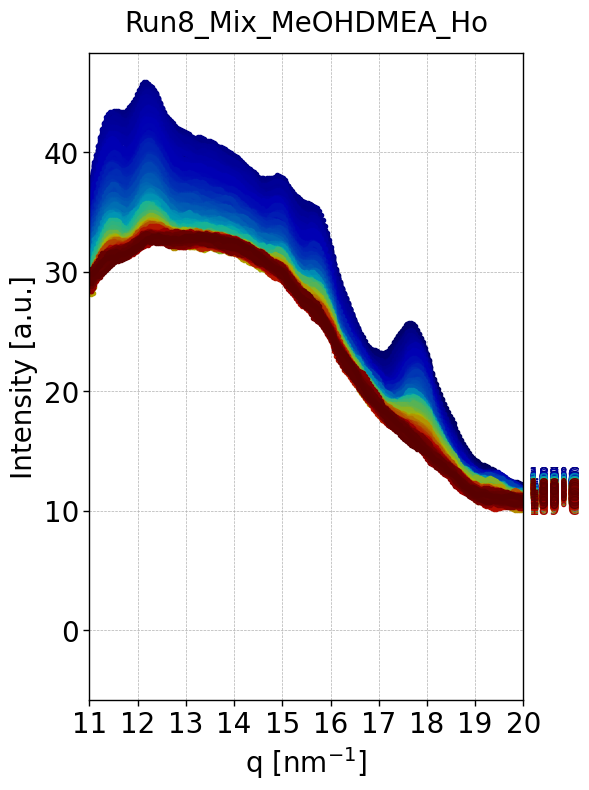

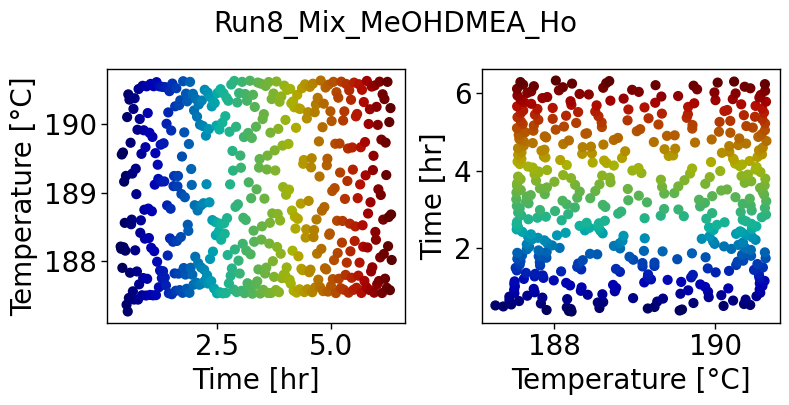

In [ ]:
import os
import re
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

def read_single_file_with_keyword(folder_path, filename_search):
    file_path = os.path.join(folder_path, f"{filename_search}")

    try:
        with open(file_path, 'r') as file:
            # Read and parse the data from the file
            # Assume the data format includes 'q_nm^-1' and 'I'
            data = {
                "q_nm^-1": [],  # List of q values
                "I": [],  # List of corresponding I values
                "sigma": [],  # List of corresponding sigma values
                "I_fit": []  # List of corresponding I_fit values
            }

            # Initialize variables
            time_hr, CTEMP, I0, bstop = None, None, None, None
            lorentian_length, lorentian_scale, peak_pos, porod_exp, porod_scale = None, None, None, None, None

            for i, line in enumerate(file):
                if i == 3 and line.startswith("#"):  # Extract values from the 4th line starting with '#'
                    values_str = line[1:].strip().split(',')
                    if len(values_str) == 4:
                        values = [float(val.strip('()')) for val in values_str]
                        time_hr, CTEMP, I0, bstop = values
                    continue

                if i == 5 and line.startswith("#"):  # Extract values from the 6th line starting with '#'
                    values_str = line[1:].strip().split(',')
                    if len(values_str) == 5:
                        values = [float(val.strip('()')) for val in values_str]
                        lorentian_length, lorentian_scale, peak_pos, porod_exp, porod_scale = values
                    continue

                if line.startswith("#"):  # Skip other comments if any
                    continue


                parts = line.strip().split()  # Assuming data is whitespace-separated
                if len(parts) >= 2:
                    q_value = float(parts[0])
                    I_value = float(parts[1])
                    I_sigma = float(parts[2])
                    I_fit = float(parts[3]) 
                   

                    # Append values to the data dictionary
                    data["q_nm^-1"].append(q_value)
                    data["I"].append(I_value)
                    data["sigma"].append(I_sigma)
                    data["I_fit"].append(I_fit)

            return data, time_hr, CTEMP, I0, bstop, lorentian_length, lorentian_scale, peak_pos, porod_exp, porod_scale

    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return None, None, None, None, None

import os
import re

def search_dat_files_with_keywords(folder_path, keyword):
    # Create a regular expression pattern to match the keyword and bkg_keyword in the filename
    pattern = re.compile(f"{keyword}", re.IGNORECASE)

    matching_dat_files = []

    # List files in the folder (not including subfolders)
    for file in os.listdir(folder_path):
        if pattern.match(file) and file.endswith('.dat'):
            matching_dat_files.append(file)

    #print(f"Found {len(matching_dat_files)} files matching the pattern '{pattern.pattern}'")
    return matching_dat_files





def darken_colors(num_colors, darker_factor=0.65):
    """
    Darken a set of colors by reducing the value component in the HSV color space.

    Parameters:
    - num_colors (int): Number of colors to generate.
    - darker_factor (float): Factor to control the darkness of the colors. Default is 0.7.

    Returns:
    - darker_colors (numpy.ndarray): Darkened colors in RGB format.
    """
    colors = plt.cm.jet(np.linspace(0, 1, num_colors))

    # Make the colors darker by reducing the value component
    darker_colors = colors.copy()

    for i in range(num_colors):
        rgb = darker_colors[i, :3]  # Extract the RGB values
        hsv = plt.cm.colors.rgb_to_hsv(rgb)  # Convert RGB to HSV
        hsv[2] *= darker_factor  # Reduce the value component
        darker_colors[i, :3] = plt.cm.colors.hsv_to_rgb(hsv)  # Convert back to RGB

    return darker_colors
# inputs for plotting


folder_path_base = '/Users/akmaurya/Library/CloudStorage/OneDrive-SLACNationalAcceleratorLaboratory/My Onedrive/Data_01/Methanolysis/Dec2023/OneD_integrated_WAXS_01/Correction/Normlised'
SAXS_sub_files = os.path.join(folder_path_base.replace("Normlised", ""), "Subtracted")
save_fig = os.path.join(folder_path_base.replace("Normlised", ""))


#keyword = "Run4_PLA_T"
#keyword="Run5_PBAT_MeOH_T"
#keyword="Run7_PET_MeOH_T"
#keyword="Run3_PET_MeOH_T"
#keyword="Run8_Mix_MeOHDMEA_Ramp190"
#keyword="Run8_Mix_MeOHDMEA_Cool"
keyword="Run8_Mix_MeOHDMEA_Hold"


offset_factor = 0
num_files_to_plot =457
i = 0
fonts = 20
max_q_value = 20


time_hr_values = []
CTEMP_values = []



# Get a list of files containing the specified keyword
matching_sample_files = [file for file in os.listdir(SAXS_sub_files) if keyword in file]
# short the matching files with data and time stamp when they are saved in the fooder
#matching_sample_files.sort(key=lambda x: os.path.getmtime(os.path.join(SAXS_sub_files, x)))

# Define a custom sorting function
def custom_sort(file_name):
    keywords = ['RT', 'Ramp', 'Hold', 'Cool']
    # Find the first keyword in the file name
    keyword_found = next((kw for kw in keywords if kw in file_name), '')
    # Extract the value after 'ctr' in the file name
    ctr_value = int(file_name.split('ctr')[-1].split('_')[0]) if 'ctr' in file_name else 0
    return (keywords.index(keyword_found), ctr_value)

# Sort the files using the custom sorting function
matching_sample_files.sort(key=lambda x: custom_sort(x))

# Now matching_sample_files is sorted first by keywords and then by the value after 'ctr'

# Create a single figure outside the loop
fig, axs = plt.subplots(figsize=(6, 8))

num_colors = num_files_to_plot + 1  # Calculate the number of colors based on the maximum m_key
darker_colors = darken_colors(num_colors, darker_factor=0.7)
#print(darker_colors)

for filename_search_sample in matching_sample_files[:num_files_to_plot]:
    print(filename_search_sample)
    sample_data, time_hr, CTEMP, I0, bstop, lorentian_length, lorentian_scale, peak_pos, porod_exp, porod_scale = read_single_file_with_keyword(SAXS_sub_files, filename_search_sample)
    q = sample_data["q_nm^-1"]
    I = sample_data["I"]
    I_sigma = sample_data["sigma"]
    I_fit = sample_data["I_fit"]

    '''Additional information to be printed
    print(f"CTEMP: {CTEMP} °C")
    print(f"Time: {time_hr} hr")
    print(f"Peak Position: {peak_pos} nm")
    print(f"Porod Exponent: {porod_exp}")
    '''

    time_hr_values.append(time_hr)
    CTEMP_values.append(CTEMP)
    
    
    #verage the intensity, time_hr, and CTEMP values for each q-value across the files in the sequence
    #avg_intensity = np.mean(np.vstack(I), axis=0)
    avg_intensity_smoothed = np.convolve(I, np.ones((10,))/10, mode='valid')  # Use a simple moving average with window size 3

    # Plot the smoothed averaged intensity values
    axs.plot(q[:len(avg_intensity_smoothed)], avg_intensity_smoothed + np.array(offset_factor * i), marker='o', markersize=3, color=darker_colors[i], label=f"Avg {matching_sample_files[i]}-{matching_sample_files[i+2]}")

    #axs.plot(q, I + np.array(offset_factor*i),marker='o', markersize=3, color=darker_colors[i],label=f"{filename_search_sample}")
    #axs.plot(q, I_fit + np.array(offset_factor**i), '--', markersize=3, color='black', label=f"Fit")
    
    q = np.array(q)
    # Create boolean masks for values within the desired range
    mask = (q >= max_q_value)

    # Apply the masks to truncate the arrays
    truncated_q_sample = q[mask]
    truncated_I_sample_sub_avg = np.array(I)[mask]
    #print(truncated_I_sample_sub_avg[1])
    # Convert CTEMP to an integer
    CTEMP = int(CTEMP)
    plt.text(max_q_value+0.1, (truncated_I_sample_sub_avg[1]+ np.array(offset_factor*i)) - 0, str(f"{CTEMP}\u00b0C"), fontsize=12, color=darker_colors[i])

    i += 1

    #time_hr_values = []
    #CTEMP_values = []
print(len(CTEMP_values))

# axs.set_ylim(0.0001,)
plt.title(f"{keyword[:-2]}", fontsize=fonts,y=1.02)
plt.xlim(11, max_q_value)
plt.xlabel('q [$\\mathrm{nm^{-1}}$]', fontsize=fonts)
plt.ylabel("Intensity [a.u.]", fontsize=fonts)
plt.xticks(fontsize=fonts)  # Set x-axis tick to 20
plt.yticks(fontsize=fonts)  # Set y-axis tick to 20

plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_linewidth(1)
plt.gca().spines['right'].set_linewidth(1)
plt.gca().spines['bottom'].set_linewidth(1)
plt.gca().spines['left'].set_linewidth(1)
plt.tick_params(axis='both', which='major', direction='out', length=4, width=1)
plt.tick_params(which='minor', width=1, size=2)  # Adjust size as needed
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Check if the "final_fig" folder exists, and create it if not
final_fig_dir = os.path.join(save_fig, "final_fig")
if not os.path.exists(final_fig_dir):
    os.makedirs(final_fig_dir)

fig.savefig(os.path.join(final_fig_dir, f"{keyword[:-2]}_WAXS.png"), dpi=300) 


# Assuming 'fonts' is defined somewhere in your code
fonts = 20

# write code to subplot the values of the fitting parameters
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
#axs[0].set_title(f"{keyword[:-2]}", fontsize=fonts, y=1.02)
axs[0].scatter(time_hr_values, CTEMP_values, marker='o',s=40, c=darker_colors[:len(CTEMP_values)])
axs[0].set_xlabel('Time [hr]', fontsize=fonts)
axs[0].set_ylabel('Temperature [°C]', fontsize=fonts)
# Set linewidth for spines, labels, and tick marks in the first subplot (axs[0])
for spine in axs[0].spines.values():
    spine.set_linewidth(1)
axs[0].tick_params(axis='both', which='major', direction='out', length=4, width=1)
axs[0].tick_params(which='minor', width=1, size=2)  # Adjust size as needed
##axs[0].set_xlim(0, 200)
# axs[0].set_ylim(0, 1.5)
axs[0].tick_params(axis='x', labelsize=fonts)  # Set x-axis tick font size
axs[0].tick_params(axis='y', labelsize=fonts)  # Set y-axis tick font size

axs[1].scatter(CTEMP_values,time_hr_values, marker='o',s=40, c=darker_colors[:len(CTEMP_values)])
axs[1].set_xlabel('Temperature [°C]', fontsize=fonts)  # Add an x-label to the axes.
axs[1].set_ylabel('Time [hr]', fontsize=fonts)  # Add a y-label to the axes.
axs[1].tick_params(axis='both', which='major', direction='out', length=4, width=1)
axs[1].tick_params(which='minor', width=1, size=2)  # Adjust size as needed
# Set linewidth for spines, labels, and tick marks in the second subplot (axs[1])
for spine in axs[1].spines.values():
    spine.set_linewidth(1)
#axs[1].set_xlim(0, 200)
# axs[1].set_ylim(0, 5)
axs[1].tick_params(axis='x', labelsize=fonts)  # Set x-axis tick font size
axs[1].tick_params(axis='y', labelsize=fonts)  # Set y-axis tick font size

plt.suptitle(f"{keyword[:-2]}", fontsize=fonts, y=1)
plt.tight_layout()
plt.show()
fig.savefig(os.path.join(final_fig_dir, f"{keyword[:-2]}_WAXS_parameters.png"), dpi=300) 



['Run8_Mix_MeOHDMEA_Ramp190_ctr0_all_avg_sub.dat', 'Run8_Mix_MeOHDMEA_Ramp190_ctr1_all_avg_sub.dat']
['Run8_Mix_MeOHDMEA_Ramp190_ctr2_all_avg_sub.dat', 'Run8_Mix_MeOHDMEA_Ramp190_ctr3_all_avg_sub.dat']
['Run8_Mix_MeOHDMEA_Ramp190_ctr4_all_avg_sub.dat', 'Run8_Mix_MeOHDMEA_Ramp190_ctr5_all_avg_sub.dat']
['Run8_Mix_MeOHDMEA_Ramp190_ctr6_all_avg_sub.dat', 'Run8_Mix_MeOHDMEA_Ramp190_ctr7_all_avg_sub.dat']
['Run8_Mix_MeOHDMEA_Ramp190_ctr8_all_avg_sub.dat', 'Run8_Mix_MeOHDMEA_Ramp190_ctr9_all_avg_sub.dat']
['Run8_Mix_MeOHDMEA_Ramp190_ctr10_all_avg_sub.dat', 'Run8_Mix_MeOHDMEA_Ramp190_ctr11_all_avg_sub.dat']
['Run8_Mix_MeOHDMEA_Ramp190_ctr12_all_avg_sub.dat', 'Run8_Mix_MeOHDMEA_Ramp190_ctr13_all_avg_sub.dat']
['Run8_Mix_MeOHDMEA_Ramp190_ctr14_all_avg_sub.dat', 'Run8_Mix_MeOHDMEA_Ramp190_ctr15_all_avg_sub.dat']
['Run8_Mix_MeOHDMEA_Ramp190_ctr16_all_avg_sub.dat', 'Run8_Mix_MeOHDMEA_Ramp190_ctr17_all_avg_sub.dat']
['Run8_Mix_MeOHDMEA_Ramp190_ctr18_all_avg_sub.dat', 'Run8_Mix_MeOHDMEA_Ramp190_ctr1

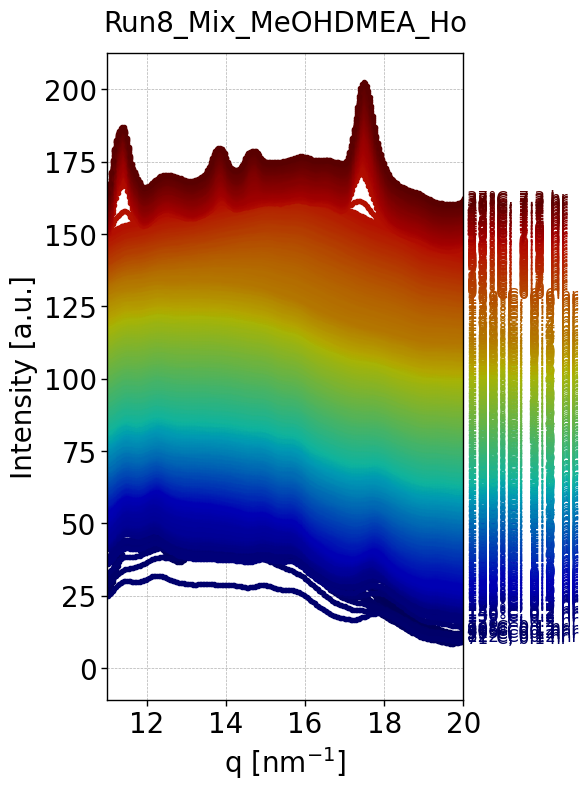

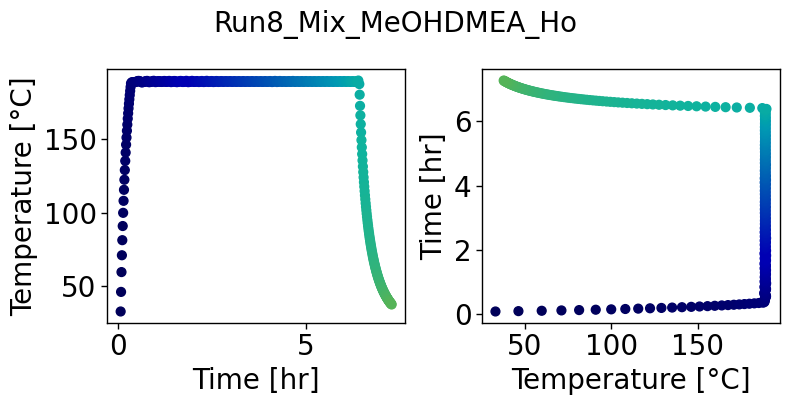

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt


folder_path_base = '/Users/akmaurya/Library/CloudStorage/OneDrive-SLACNationalAcceleratorLaboratory/My Onedrive/Data_01/Methanolysis/Dec2023/OneD_integrated_WAXS_01/Correction/Normlised'
SAXS_sub_files = os.path.join(folder_path_base.replace("Normlised", ""), "Subtracted")
save_fig = os.path.join(folder_path_base.replace("Normlised", ""))

keyword_base = "Run8_Mix_MeOHDMEA"
offset_factor = 0.2
num_files_to_plot = 700
fonts = 20
max_q_value = 20

# Choose the starting index for the continuous sequence
start_index = 0
num_ave_files = 2

time_hr_values = []
CTEMP_values = []

# Get a list of files containing the specified keyword
matching_sample_files = [file for file in os.listdir(SAXS_sub_files) if keyword_base in file]
# Define a custom sorting function
def custom_sort(file_name):
    keywords = ['RT', 'Ramp', 'Hold', 'Cool']
    # Find the first keyword in the file name
    keyword_found = next((kw for kw in keywords if kw in file_name), '')
    # Extract the value after 'ctr' in the file name
    ctr_value = int(file_name.split('ctr')[-1].split('_')[0]) if 'ctr' in file_name else 0
    return (keywords.index(keyword_found), ctr_value)

# Sort the files using the custom sorting function
matching_sample_files.sort(key=lambda x: custom_sort(x))

# Create a single figure outside the loop
fig, axs = plt.subplots(figsize=(6, 8))

num_colors = num_files_to_plot + 1
darker_colors = darken_colors(num_colors, darker_factor=0.7)



for i in range(start_index, start_index + num_files_to_plot, num_ave_files):
    print(matching_sample_files[i:i+num_ave_files])
    
    # Initialize arrays to store intensity, time_hr, and CTEMP values for each file in the sequence
    intensity_arrays = []
    time_hr_arrays = []
    CTEMP_arrays = []
    
    for filename_search_sample in matching_sample_files[i:i+3]:
        #print(filename_search_sample)
        sample_data, time_hr, CTEMP, I0, bstop, lorentian_length, lorentian_scale, peak_pos, porod_exp, porod_scale = read_single_file_with_keyword(SAXS_sub_files, filename_search_sample)
        q = sample_data["q_nm^-1"]
        intensity_arrays.append(sample_data["I"])
        time_hr_arrays.append(time_hr)
        CTEMP_arrays.append(CTEMP)

        #axs.plot(q, sample_data["I"], marker='o', markersize=3, color=darker_colors[i], label=f"{filename_search_sample}")

    # Average the intensity, time_hr, and CTEMP values for each q-value across the files in the sequence
    avg_intensity = np.mean(np.vstack(intensity_arrays), axis=0)
    avg_time_hr = np.mean(time_hr_arrays)
    avg_CTEMP = np.mean(CTEMP_arrays)
    

    # Average the intensity, time_hr, and CTEMP values for each q-value across the files in the sequence
    avg_intensity = np.mean(np.vstack(intensity_arrays), axis=0)
    avg_intensity_smoothed = np.convolve(avg_intensity, np.ones((10,))/10, mode='valid')  # Use a simple moving average with window size 3

    # Plot the smoothed averaged intensity values
    axs.plot(q[:len(avg_intensity_smoothed)], avg_intensity_smoothed + np.array(offset_factor * i), marker='o', markersize=3, color=darker_colors[i], label=f"Avg {matching_sample_files[i]}-{matching_sample_files[i+2]}")

    # Plot the averaged intensity values
    #axs.plot(q, avg_intensity+ np.array(offset_factor * i), marker='o', markersize=3, color=darker_colors[i], label=f"Avg {matching_sample_files[i]}-{matching_sample_files[i+2]}")

    # Store the averaged time_hr and CTEMP values
    time_hr_values.append(avg_time_hr)
    CTEMP_values.append(avg_CTEMP)


    #axs.plot(q, I + np.array(offset_factor*i),marker='o', markersize=3, color=darker_colors[i],label=f"{filename_search_sample}")
    #axs.plot(q, I_fit + np.array(offset_factor**i), '--', markersize=3, color='black', label=f"Fit")
    
    q = np.array(q)
    # Create boolean masks for values within the desired range
    mask = (q >= max_q_value)

    # Apply the masks to truncate the arrays
    truncated_q_sample = q[mask]
    truncated_I_sample_sub_avg = np.array(avg_intensity)[mask]
    #print(truncated_I_sample_sub_avg[1])
    # Convert CTEMP to an integer
    avg_CTEMP = int(avg_CTEMP)
    avg_time_hr = round(avg_time_hr, 1)  
    plt.text(max_q_value+0.1, (truncated_I_sample_sub_avg[1]+ np.array(offset_factor*i)) - 0, str(f"{avg_CTEMP}\u00b0C, {avg_time_hr} hr"), fontsize=12, color=darker_colors[i])

    i += 1

    #time_hr_values = []
    #CTEMP_values = []
print(len(CTEMP_values))

# axs.set_ylim(0.0001,)
plt.title(f"{keyword[:-2]}", fontsize=fonts,y=1.02)
plt.xlim(11, max_q_value)
plt.xlabel('q [$\\mathrm{nm^{-1}}$]', fontsize=fonts)
plt.ylabel("Intensity [a.u.]", fontsize=fonts)
plt.xticks(fontsize=fonts)  # Set x-axis tick to 20
plt.yticks(fontsize=fonts)  # Set y-axis tick to 20

plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_linewidth(1)
plt.gca().spines['right'].set_linewidth(1)
plt.gca().spines['bottom'].set_linewidth(1)
plt.gca().spines['left'].set_linewidth(1)
plt.tick_params(axis='both', which='major', direction='out', length=4, width=1)
plt.tick_params(which='minor', width=1, size=2)  # Adjust size as needed
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Check if the "final_fig" folder exists, and create it if not
final_fig_dir = os.path.join(save_fig, "final_fig")
if not os.path.exists(final_fig_dir):
    os.makedirs(final_fig_dir)

fig.savefig(os.path.join(final_fig_dir, f"{keyword[:-2]}_WAXS.png"), dpi=300) 


# Assuming 'fonts' is defined somewhere in your code
fonts = 20

# write code to subplot the values of the fitting parameters
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
#axs[0].set_title(f"{keyword[:-2]}", fontsize=fonts, y=1.02)
axs[0].scatter(time_hr_values, CTEMP_values, marker='o',s=40, c=darker_colors[:len(CTEMP_values)])
axs[0].set_xlabel('Time [hr]', fontsize=fonts)
axs[0].set_ylabel('Temperature [°C]', fontsize=fonts)
# Set linewidth for spines, labels, and tick marks in the first subplot (axs[0])
for spine in axs[0].spines.values():
    spine.set_linewidth(1)
axs[0].tick_params(axis='both', which='major', direction='out', length=4, width=1)
axs[0].tick_params(which='minor', width=1, size=2)  # Adjust size as needed
##axs[0].set_xlim(0, 200)
# axs[0].set_ylim(0, 1.5)
axs[0].tick_params(axis='x', labelsize=fonts)  # Set x-axis tick font size
axs[0].tick_params(axis='y', labelsize=fonts)  # Set y-axis tick font size

axs[1].scatter(CTEMP_values,time_hr_values, marker='o',s=40, c=darker_colors[:len(CTEMP_values)])
axs[1].set_xlabel('Temperature [°C]', fontsize=fonts)  # Add an x-label to the axes.
axs[1].set_ylabel('Time [hr]', fontsize=fonts)  # Add a y-label to the axes.
axs[1].tick_params(axis='both', which='major', direction='out', length=4, width=1)
axs[1].tick_params(which='minor', width=1, size=2)  # Adjust size as needed
# Set linewidth for spines, labels, and tick marks in the second subplot (axs[1])
for spine in axs[1].spines.values():
    spine.set_linewidth(1)
#axs[1].set_xlim(0, 200)
# axs[1].set_ylim(0, 5)
axs[1].tick_params(axis='x', labelsize=fonts)  # Set x-axis tick font size
axs[1].tick_params(axis='y', labelsize=fonts)  # Set y-axis tick font size

plt.suptitle(f"{keyword[:-2]}", fontsize=fonts, y=1)
plt.tight_layout()
plt.show()
fig.savefig(os.path.join(final_fig_dir, f"{keyword[:-2]}_WAXS_parameters.png"), dpi=300) 

In [ ]:
import numpy as np

def smooth_data(data, window_size=3):
    if len(data) < window_size:
        raise ValueError("Window size should be smaller than the length of the data.")

    weights = np.ones(window_size) / window_size
    smoothed_data = np.convolve(data, weights, mode='valid')

    return smoothed_data

# Example data with shape (1000, 1000)
intensity_data = np.random.normal(0, 1, (1000, 1000))




Run8_Mix_MeOHDMEA_Ramp190_ctr0_all_avg_sub.dat
Run8_Mix_MeOHDMEA_Ramp190_ctr1_all_avg_sub.dat
Run8_Mix_MeOHDMEA_Ramp190_ctr2_all_avg_sub.dat
Run8_Mix_MeOHDMEA_Ramp190_ctr3_all_avg_sub.dat
Run8_Mix_MeOHDMEA_Ramp190_ctr4_all_avg_sub.dat
Run8_Mix_MeOHDMEA_Ramp190_ctr5_all_avg_sub.dat
Run8_Mix_MeOHDMEA_Ramp190_ctr6_all_avg_sub.dat
Run8_Mix_MeOHDMEA_Ramp190_ctr7_all_avg_sub.dat
Run8_Mix_MeOHDMEA_Ramp190_ctr8_all_avg_sub.dat
Run8_Mix_MeOHDMEA_Ramp190_ctr9_all_avg_sub.dat
Run8_Mix_MeOHDMEA_Ramp190_ctr10_all_avg_sub.dat
Run8_Mix_MeOHDMEA_Ramp190_ctr11_all_avg_sub.dat
Run8_Mix_MeOHDMEA_Ramp190_ctr12_all_avg_sub.dat
Run8_Mix_MeOHDMEA_Ramp190_ctr13_all_avg_sub.dat
Run8_Mix_MeOHDMEA_Ramp190_ctr14_all_avg_sub.dat
Run8_Mix_MeOHDMEA_Ramp190_ctr15_all_avg_sub.dat
Run8_Mix_MeOHDMEA_Ramp190_ctr16_all_avg_sub.dat
Run8_Mix_MeOHDMEA_Ramp190_ctr17_all_avg_sub.dat
Run8_Mix_MeOHDMEA_Ramp190_ctr18_all_avg_sub.dat
Run8_Mix_MeOHDMEA_Ramp190_ctr19_all_avg_sub.dat
Run8_Mix_MeOHDMEA_Ramp190_ctr20_all_avg_sub.dat
Ru

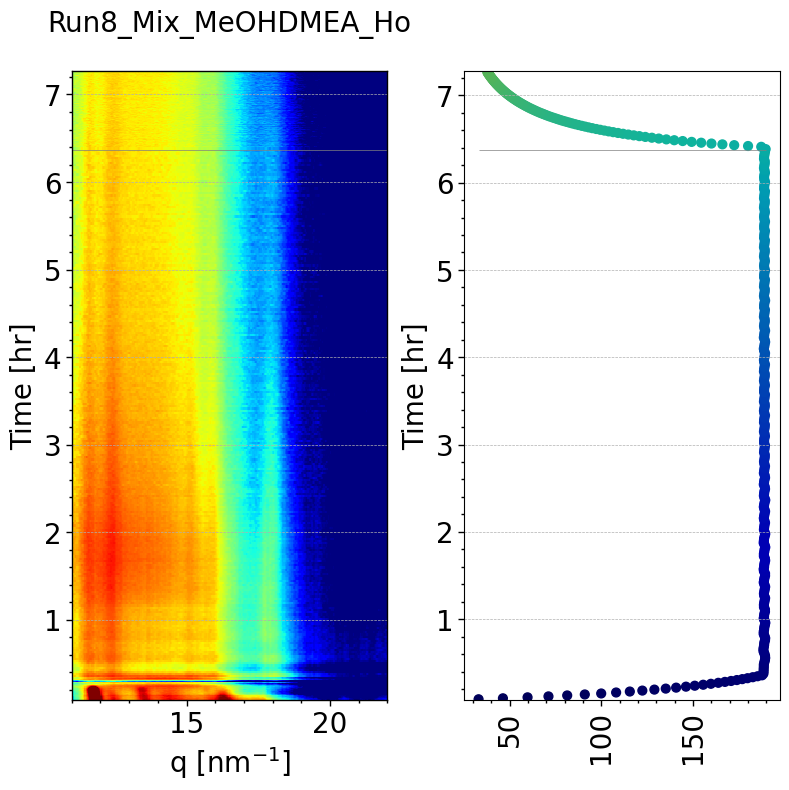

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Create a figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 8))

time_hr_values_2d = time_hr_values
# First Panel: Color 2D Plot
num_colors = num_files_to_plot + 1
numfiles = len(time_hr_values_2d)
darker_colors = darken_colors(num_colors, darker_factor=0.7)

intensity_data = np.empty((len(matching_sample_files[:numfiles]), len(q)))

q_mesh, time_mesh = np.meshgrid(q, np.array(time_hr_values_2d))

for i, filename_search_sample in enumerate(matching_sample_files[:numfiles]):
    print(filename_search_sample)
    sample_data, time_hr, CTEMP, I0, bstop, lorentian_length, lorentian_scale, peak_pos, porod_exp, porod_scale = read_single_file_with_keyword(SAXS_sub_files, filename_search_sample)
    q = np.array(sample_data["q_nm^-1"])
    I = np.array(sample_data["I"])
    I_sigma = sample_data["sigma"]

    # Smooth the noisy data
    I_smoothed = smooth_data(I, window_size=10)

    # Update the original array with the smoothed data
    intensity_data[i, :len(I_smoothed)] = I_smoothed
    intensity_data[i, :] = I 

# Replace non-positive or zero values with a small positive value
intensity_data_log = np.log(np.maximum(intensity_data, 1e-10))

# Plot the surface using imshow with log scale and 'lower' origin
#im = axs[0].imshow(intensity_data_log, cmap='jet', extent=[q.min(), q.max(), time_mesh.min(), time_mesh.max()], aspect='auto', origin='lower', vmin=2.5, vmax=4)
im = axs[0].pcolormesh(q, time_hr_values_2d, intensity_data_log, cmap='jet', shading='auto', vmin=2.5, vmax=4)

# Add a colorbar
#cbar = fig.colorbar(im, ax=axs[0], label='Intensity [a.u.]', format="%d", pad=0.1, shrink=0.8,location='top')
#cbar.ax.yaxis.set_tick_params(labelsize=fonts)
#cbar.set_label('Intensity [a.u.]', fontsize=fonts)
#cbar.mappable.set_clim(2.5, 4)
print(len(time_hr_values_2d))
print(len(time_hr_values))

#for i in range(len(time_hr_values_2d)):
    #print(f"{time_hr_values_2d[i]:.1f} {time_hr_values[i]:.1f} {CTEMP_values[i]:.1f}")
# Additional Line: Draw horizontal line on the first subplot
axs[0].hlines(6.37, q.min(), q.max(), color='gray', linewidth=0.5)


axs[0].set_xlabel('q [$\\mathrm{nm^{-1}}$]', fontsize=fonts)
axs[0].set_ylabel('Time [hr]', fontsize=fonts)
axs[0].set_xlim([11, 22])
axs[0].set_ylim([min(time_hr_values), max(time_hr_values)])

for spine in axs[0].spines.values():
    spine.set_linewidth(1)
axs[0].tick_params(axis='both', which='major', direction='out', length=4, width=1)
axs[0].tick_params(which='minor', width=1, size=2)
axs[0].tick_params(axis='x', labelsize=fonts)
axs[0].tick_params(axis='y', labelsize=fonts)
axs[0].grid(axis='y', linestyle='--', linewidth=0.5)
axs[0].minorticks_on()
axs[0].set_title(f"{keyword[:-2]}", fontsize=fonts, y=1.05)

# Second Panel: Time vs CTEMP with Vertical X-axis
axs[1].scatter(CTEMP_values, time_hr_values, marker='o', s=40, c=darker_colors[:len(CTEMP_values)])
axs[1].set_xlabel('')
axs[1].set_ylabel('Time [hr]', fontsize=fonts)
axs[1].tick_params(axis='both', which='major', direction='out', length=4, width=1)
axs[1].tick_params(which='minor', width=1, size=2)
axs[1].tick_params(axis='x', labelrotation=90, labelsize=fonts)  # Rotate x-axis labels vertically
axs[1].tick_params(axis='y', labelsize=fonts)
axs[1].set_ylim([min(time_hr_values)-0.01, max(time_hr_values)+0.01])
axs[1].minorticks_on()
 #Additional Line: Draw horizontal line on the second subplot
axs[1].hlines(6.37, np.array(CTEMP_values).min(), np.array(CTEMP_values).max(), color='gray', linewidth=0.5)

axs[1].grid(axis='y', linestyle='--', linewidth=0.5)
# Remove x-axis labels from the second subplot
#axs[1].set_xticks([])

# Set the aspect ratio for the second subplot using the aspect ratio of the first subplot
aspect_ratio = axs[1].get_aspect()
axs[1].set_aspect(aspect_ratio)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
